# **PROBLEM SOLVING DESIGN**

![Lean StartUp Feedback Loop](../img/project_structure/lean_startup_feedback_loop.jpg)

# **BUSINESS CONTEXT**

## **What is the company?**

Hotmart

## **What is its business model?**

Two-sided marketplace. It is a platform for buying, selling and promoting digital products in which Hotmart connects product creators/disseminators to their customers.

## **What is the company stage on the market?**

"Virality" (Lean Analytics) or "early majority" (Innovation Adoption Curve). The company found a pain in the market and validated a product that solves the pain; now is the time to increase the customer base.

# **BUSINESS PROBLEM**

## **What is the business problem the company is facing?**

The company wants to get insight based on customers' data in order to unveil new product opportunities, especially in terms of product success, customer segmentation, and revenue estimation.

## **What is the business solution that this project has to deliver?**

A presentation of storytelling insights based on the available data and, possibly, answers to the following questions:
- Does Hotmart depend on the biggest producers on the platform? That is, the top-selling producers are responsible for most of the
Hotmart billing?
- Are there any relevant patterns or trends in the data?
- It is possible to segment users based on their characteristics (revenue, product niche, etc.)?
- What features most impact the success of a product? that is, the What makes a product sell more?
- It is possible to estimate how much revenue Hotmart will generate in the next three months from the last month shown in the dataset?

**References:**
- Case description
- https://hotmart.com/pt-br

# **SCOPE AND BUSINESS ASSUMPTIONS**

- **Company focus is to scale customer base (not necessarily increase revenue)**
- **When affiliate comission is NaN, assumed to mean zero (0)**


# **SOLUTION STRATEGY**

![IoT method](../img/project_structure/iot_method.png)*IOT (Input-Output-Taks) is a planning strategy to structure a problem solution and make sure it delivers a solution that solves the initial problem.*

### INPUT

- **Business context**:
    - It is a platform for buying, selling and promoting digital products in which Hotmart connects product creators/disseminators to their customers.
    - In principle, Hotmart makes money by **taxing**, either the creators or the disseminators, **a percentage of the purchase by the customer**.
- **Business problem**:
    - The company wants to get **insights** based on customers' data in order to **unveil new product opportunities**, especially in terms of product success, customer segmentation, and revenue estimation.
- **Business questions**:
    - Does **Hotmart depend** on the **biggest producers** on the platform? That is, the **top-selling producers** are responsible for **most** of the Hotmart **billing**?
    - Are there any **relevant patterns or trends** in the data?
    - It is possible to **segment users** based on their characteristics (revenue, product niche, etc.)?
    - What **features most impact** the success of a **product**? that is, the What makes a **product sell more**?
    - It is possible to **estimate** how much **revenue** Hotmart will generate in the **next three months from the last month** shown in the dataset?
- **Available data**:
    - Data referring to a **sample of purchases made** at Hotmart in 2016. These are more than 1.5 million records of purchases made on our **platform**.

### OUTPUT 

- A presentation of storytelling insights based on the available data and, possibly, answers to the previous questions.

### TASKs

- *QUESTION*:
    - Does **Hotmart depend** on the **biggest producers** on the platform? That is, the **top-selling producers** are responsible for **most** of the Hotmart **billing**?
        - What are the biggest producers on the platform? What is its definition?
            - Assuming higher than 95th percentile of volume of product sold.
        - What it means to be dependent on some producers?
            - Assuming "Pareto rule" like: 80% of revenue comes from the 5th top selling producers
        - What is the revenue difference from this customers to the remaining one?
            - Compare revenues

<br >

- *QUESTION*:
    - Are there any **relevant patterns or trends** in the data?
        - Check for features (correlation between features, feature distributions and time-changes trends) that shows patterns in terms of customers/producers groups or revenue impact or scaling impact.

<br >

- *QUESTION*:
    - It is possible to **segment users** based on their characteristics (revenue, product niche, etc.)?
        - What is the purpose of segmenting customers?
          - Find out what are the best customers and what coould be done to change the behaviour of the not-best ones. 
          - Revenue from best customer could support scaling efforts.
        - Check for features that can cluster customer/producers for better revenue undestanding
          - Initially try RFM (Recency-Frequency-Monetary)

<br >      

- *QUESTION*:
    - What **features most impact** the success of a **product**? that is, what makes a **product sell more**?
        - Success of a product = number of products sold
            - Inspect features with high correlation to the number of product sold
            - Inspect feature with high correlation with an increasing trend of products sold
            - Check for simple causal inference techniques
              - knowing features that best impact the product success, we can use this feature for marketing purpose (scalling effort) and, perhaps, get a better overview about what leads to focus on.

<br >

- *QUESTION*:
    - It is possible to **estimate** how much **revenue** Hotmart will generate in the **next three months from the last month** shown in the dataset?
        - Check the revenue time-series to understand how to extrapolate it to the future
            - Visual inspection
            - Check for trend and seasonality and noise
            - Define baseline (dummy = last available date)
                - Initially, ARIMA model
                - If possible, machine learning models
                - Check model error and extrapolate to business impact
                  - knowing revenue forecast we can predcit scaling investments and even prepone investments.

# **PRODUCT BUILDING ROADMAP**

![CRISP-DS Framework](../img/project_structure/crisp_ds.jpg)

---
---
---

# **0 - HELPERS**

## 0.1 - Libraries

*Import required libraries*

In [1]:
# don't cache libraries (especially project library)
%load_ext autoreload
%autoreload 2

In [2]:
# setup and environment
import os
from   pathlib import Path

# save artifacts
import pickle

# data extraction
from sqlalchemy import create_engine

# data manipulation
import numpy  as np
import pandas as pd

# data visualization
import seaborn           as sns
import matplotlib.pyplot as plt
from   matplotlib.axis   import Axis

# statistics
from scipy.stats import mannwhitneyu

# sklearn pipelines
from sklearn.pipeline      import Pipeline, make_pipeline
from sklearn.compose       import ColumnTransformer
from sklearn.compose       import make_column_selector
from sklearn.preprocessing import RobustScaler
from category_encoders     import TargetEncoder
from sklearn               import set_config; 
set_config(display='diagram')

# model tracking
import mlflow

# clustering
from sklearn.metrics import silhouette_score, silhouette_samples
from sklearn.cluster import KMeans, DBSCAN
from sklearn.mixture import GaussianMixture

# time series
import pmdarima                    as     pm
from prophet                       import Prophet
from prophet.plot                  import plot_cross_validation_metric
from prophet.diagnostics           import cross_validation, performance_metrics
from statsmodels.tsa.seasonal      import seasonal_decompose
from statsmodels.tsa.stattools     import adfuller
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf, plot_predict
from statsmodels.tsa.arima.model   import ARIMA

# project library
from project_lib.initial_config      import initial_settings
from project_lib.data_description    import (check_dataframe, inspect_dtypes, 
                                             check_na_unique_dtypes, check_dtype_convertion,
                                             summary_statistics, categorical_summary, datetime_summary
                                             )
from project_lib.data_exploration    import (numerical_plot, categorical_plot, datetime_plot,
                                             create_cramer_v_dataframe)
from project_lib.ab_testing          import check_for_bias
from project_lib.clustering_analysis import silhouette_inspection

/home/ds-gustavo-cunha/.pyenv/versions/hotmart_case/lib/python3.10/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm
Importing plotly failed. Interactive plots will not work.


## 0.2 - Functions

*Define functions that will be used on the project*

NOTE: Most functions made for this project are inside the project library. That is, **a package called "project_lib" was created to hold all functions that will be needed for this project.**


For further details, please check the modules inside "project_lib" package [in other words, check .py files inside project_lib folder]

In [3]:
# example of function created for this project
help(check_dataframe)

Help on function check_dataframe in module project_lib.data_description:

check_dataframe(dataframe: pandas.core.frame.DataFrame, summary_stats=False, head: bool = False, size: int = 5) -> None
    It displays the number of NAs, the percentage of NA, the number of unique values and
    the data type for each column.
    
    It can (depending on summary_stats param) also displays dataframe shape and
    also displays statistics for numerical variables.
    
    Finally, it displays the dataframe head or a random sample of dataframe according to user choice.
    
    Args
        dataframe: the pandas dataframe that the user wants to check.
        summary_stats: a boolean to indicate if user wants to see summary statistic
            for numerical features.
        head: boolean that indicate if user wants to see
            the head of the dataframe (True) or
            a sample of the dataframe (False)
        size: size of the dataframe.head() or dataframe.sample() function .
    


## 0.3 - Setup

*Define basic configurations*

In [4]:
# initial setup of dataframes and plots
initial_settings(storytelling=False)

## 0.4 - Constants

*Define reusuable constants*

In [5]:
# define the project root path that will be the "baseline" for all paths in the notebook
PROJECT_ROOT_PATH = Path.cwd().parent
PROJECT_ROOT_PATH

PosixPath('/home/ds-gustavo-cunha/Projects/hotmart_case')

In [6]:
# # variables to connect to data source
# HOST=os.environ["HOST"]
# PORT=os.environ["PORT"]
# USER=os.environ["USER"]
# PASSWORD=os.environ["PASSWORD"]
# SCHEMA=os.environ["SCHEMA"]
# TABLE=os.environ["TABLE"]

# **1 - DATA EXTRACTION**

## 1.1 - Entity Relationship Diagram

*Display Entity-Relationship Diagram to a better data understanding*

In [7]:
# Not available -> datasets are already merged

## 1.2 - Data Fields Description

*Describe available data in regard to database information*


---

Na Hotmart, possuímos três principais personas que integram nosso negócio: os produtores, os afiliados e os compradores.
- Produtores são pessoas que criam produtos digitais na Hotmart, como cursos de idiomas, ebooks de receitas culinárias, audiolivros, softwares, dentre muitos outros exemplos.
- Afiliados são pessoas que promovem produtos dos produtores em troca de uma comissão na venda, que varia de produto para produto, e de afiliado para afiliado.
- Compradores são pessoas que adquirem um ou mais produtos digitais.
    
Uma venda é feita por um afiliado quando alguém clica em um link de afiliados. Eles geralmente fazem a promoção desses produtos em redes sociais, vídeos, anúncios, etc.

Já uma venda é feita por um produtor quando alguém tem acesso direto ao seu produto, sem intermediação do afiliado. Por exemplo, pessoas que seguem o Whindersson Nunes no Youtube e entraram em seu site oficial para adquirir seu produto, ou clicaram no link do produto sem código de afiliação.

---

---

Durante sua avaliação, você irá analisar dados referentes a uma amostra de compras feitas na Hotmart em 2016. Tratam-se de mais de 1,5 milhão registros de compras realizadas em nossa plataforma. Abaixo, nós iremos detalhar o que significa cada campo:
- **purchase_id**: Identificação da compra na Hotmart;
- **product_id**: Identificação do produto na Hotmart;
- **affiliate_id**: Identificação do afiliado na Hotmart;
- **producer_id**: Identificação do produtor na Hotmart;
- **buyer_id**: Identificação do comprador na Hotmart;
- **purchase_date**: Data e hora em que a compra foi realizada;
- **product_creation_date**: Data e hora em que o produto foi criado na Hotmart;
- **product_category**: categoria do produto na Hotmart. Exemplo: e-book, software, curso online, e-tickets, etc.;
- **product_niche**: nicho de mercado que o produto faz parte. Exemplo: educação, saúde e bem-estar, sexualidade, etc.;
- **purchase_value**: valor da compra. Esse dado, assim como nicho e categoria foi codificado para manter a confidencialidade. O valor apresentado no dataset é o z-score do valor real;
- **affiliate_commission_percentual**: percentual de comissão que o afiliado receberá da compra;
- **purchase_device**: tipo de dispositivo utilizado no momento da compra, como: Desktop, Mobile, Tablet, ou Outros;
- **purchase_origin**: endereço do site do qual a pessoa veio antes da compra. Por exemplo, se uma pessoa veio do Facebook, Youtube, ou até mesmo de outra página no site oficial do produto;
- **is_origin_page_social_network**: informa se essa compra veio de uma URL do Facebook, Youtube, Instagram, Pinterest, ou Twitter.

---

---

Algumas regras de negócio:
- Quando a compra for feita diretamente pelo produtor, ou seja, quando não houver afiliado intermediando a compra, o campo affiliate_commission_percentual terá valor 0, e o campo affiliate_id será igual ao producer_id;
- No campo purchase_origin nós apenas consideramos o host do site. Isso quer dizer que, se uma pessoa veio do site www.meuproduto.com/promocoes, esse campo só irá retornar o valor www.meuproduto.com;

---

## 1.3 - Data Loading

*Load data from required files*

In [8]:
# # define connection "endpoint"
# db_connection_str = f'mysql+pymysql://{USER}:{PASSWORD}@{HOST}/{SCHEMA}'
# # create an engine to connect to database
# db_connection = create_engine(db_connection_str)

# # define query to get data
# query=f"""
# SELECT *
# FROM {TABLE}
# """

# # read all data from database
# df_sql = pd.read_sql(sql=query, con=db_connection)
# df_sql

In [9]:
# # save data to parquet so as to not overload database server unnecessarily
# df_sql.to_parquet(
#     path=os.path.join(PROJECT_ROOT_PATH, "data", "raw_data", "customer_data.parquet")
# )

In [10]:
# read data from local source
df_extraction = pd.read_parquet(
    path=os.path.join(PROJECT_ROOT_PATH, "data", "raw_data", "customer_data.parquet")
)

# inspect results
df_extraction.sample(5)

purchase_id  product_id  affiliate_id  producer_id  buyer_id   
896323     12659483      208224        349701       349701   7068848  \
298687     11444906       54633        549368       549368   3818449   
380015     11613732      124587        218218       218218   6568589   
378607     11610730      164433       3599751      3599751   6567125   
657104     12179080       84555        851801       851801   6839348   

             purchase_date product_creation_date product_category   
896323 2016-04-18 02:48:46   2016-02-28 17:09:07    Phisical book  \
298687 2016-02-07 09:00:10   2013-03-17 18:01:19    Phisical book   
380015 2016-02-18 14:17:01   2014-11-17 15:37:25    Phisical book   
378607 2016-02-18 10:49:59   2015-07-26 20:11:10    Phisical book   
657104 2016-03-21 11:18:27   2014-02-03 20:06:47     Subscription   

              product_niche  purchase_value  affiliate_commission_percentual   
896323   Anxiety management           0.132                            0.000  \
298687  Presentation skills           0.185                            0.000   
380015     Global diplomacy          -0.429                            0.000   
378607   Anxiety management           0.358                            0.000   
657104  Presentation skills          -0.534                            0.000   

       purchase_device purchase_origin is_origin_page_social_network  Venda  
896323        eReaders     Origin c3be                           0,0      1  
298687         Desktop     Origin 08a4                           0,0      1  
380015        eReaders     Origin 2e7f                           0,0      1  
378607        eReaders     Origin 5eab                           0,0      1  
657104         Desktop     Origin a894                           0,0      1  

[5 rows x 15 columns]

# **2 - DATA DESCRIPTION**

## 2.1 - Restore Point

*Create a checkpoint of the last dataframe from previous section*

In [11]:
# create a restore point of the previous section
df_description = df_extraction.copy()

# check dataframe for this new section
check_dataframe( dataframe=df_description, summary_stats=True, head=True )

*************************************************
Dataframe size in memory: 660.704 MB 

-----------------------------
Dataframe overview:


-----------------------------

 Dataframe shape is (1599828, 15) 

-----------------------------


Statistics for Numerical Variables [NaNs are ignored]:


-----------------------------


dataframe.head(5)


purchase_id  product_id  affiliate_id  producer_id  buyer_id   
0      1663958        6640        209372       116238   1200397  \
1      1677087        2350        141418         2821   1083764   
2      2017360       35669        618642       618642   1436106   
3      2017379       57998       1164511        70388   1436118   
4      2017382       58329       1261488       221253   1386357   

        purchase_date product_creation_date product_category   
0 2016-06-26 12:00:00   2011-03-19 15:47:36            Video  \
1 2016-06-26 12:00:00   2010-07-05 01:50:15          Podcast   
2 2016-06-26 12:00:00   2012-06-13 02:59:37          Podcast   
3 2016-06-26 12:00:00   2013-05-07 08:51:31          Podcast   
4 2016-06-26 12:00:00   2013-05-12 08:12:06          Podcast   

         product_niche  purchase_value  affiliate_commission_percentual   
0  Presentation skills            -0.3                              NaN  \
1     Child psychology            -0.2                              NaN   
2  Presentation skills            -0.5                              NaN   
3   Anxiety management            -0.4                              NaN   
4     Teaching English            -0.5                              NaN   

  purchase_device purchase_origin is_origin_page_social_network  Venda  
0        Smart TV     Origin ef2b                           0,0      1  
1        Smart TV     Origin ef2b                           0,0      1  
2        Smart TV     Origin ef2b                           0,0      1  
3        Smart TV     Origin ef2b                           0,0      1  
4        Smart TV     Origin ef2b                           0,0      1  

[5 rows x 15 columns]

*************************************************


In [12]:
# delete previous section dataframe to save memory
lst = [df_extraction]
del lst
del df_extraction

## 2.2 - Rename Columns

*Search for misleading or error-prone column names*

In [13]:
# inspect column names
df_description.columns

Index(['purchase_id', 'product_id', 'affiliate_id', 'producer_id', 'buyer_id',
       'purchase_date', 'product_creation_date', 'product_category',
       'product_niche', 'purchase_value', 'affiliate_commission_percentual',
       'purchase_device', 'purchase_origin', 'is_origin_page_social_network',
       'Venda'],
      dtype='object')

In [14]:
# lower the case of venda column
df_description = df_description.rename(columns={"Venda": "sell"})

# inspect results
df_description.columns

Index(['purchase_id', 'product_id', 'affiliate_id', 'producer_id', 'buyer_id',
       'purchase_date', 'product_creation_date', 'product_category',
       'product_niche', 'purchase_value', 'affiliate_commission_percentual',
       'purchase_device', 'purchase_origin', 'is_origin_page_social_network',
       'sell'],
      dtype='object')

## 2.3 - Check Data Dimensions

*Check dataframe dimensions to know if pandas will be enough to handle such data size or we will need Big Data tools like Spark*

In [15]:
# check number of rows and columns
print( f'\
Dataframe has {df_description.shape[0]:,} \
rows and {df_description.shape[1]} columns' )

Dataframe has 1,599,828 rows and 15 columns


## 2.4 - Data Types

*Check if data types on dataframe makes sense according to database information*

In [16]:
# define shape before dtype convertion
shape_before = df_description.shape

# inspect dataframe types
inspect_dtypes(df_description, 15)

In [17]:
# inspect basic column descriptions
check_na_unique_dtypes(df_description);

*************************************************
Dataframe size in memory: 660.704 MB 

-----------------------------
Dataframe overview:


-----------------------------

 Dataframe shape is (1599828, 15) 



In [18]:
# print report
print(
    f"Unique values in colum 'sell': {set(df_description['sell'].tolist())}"
)

Unique values in colum 'sell': {1}


In [19]:
# print report
print(
    f"Unique values in colum 'sell': {set(df_description['is_origin_page_social_network'].tolist())}"
)

# convert column is_origin_page_social_network to boolean
df_description["is_origin_page_social_network"] = df_description["is_origin_page_social_network"].apply( lambda x: True if x == '0,0' else False if x == '1,0' else "NaN")

# print report
print(
    f"Unique values in colum 'sell' after transformation: {set(df_description['is_origin_page_social_network'].tolist())}"
)

Unique values in colum 'sell': {'1,0', '0,0'}
Unique values in colum 'sell' after transformation: {False, True}


In [20]:
# sanity check
assert df_description.shape == shape_before, "Data was missed during dtype convertion"

## 2.5 - Data Validation

*Check if columns make sense in regard to business understanding*

In [21]:
# as data was already made available to us 
# and there is no way to validate data source,
# no need for data validation right now.

## 2.6 - Check Duplicated Rows

*Inspect duplicated rows and handle them properly*

In [22]:
# define dataframe grain
grain = ["purchase_id"]

# check duplicated rows
print(
    f'{"*"*49}\n\n'
    f'There are {df_description.duplicated(keep=False).sum():,} '
    f'duplicated rows [{df_description.duplicated(keep=False).mean()*100:.2f}%] based on all columns. '
    f'Duplicated rows are double counted.'
    f'\n\n{"*"*49}\n\n'
    f'Dataframe granularity: {grain}\n\n'
    f'There are {df_description.duplicated(subset=grain, keep=False).sum():,} duplicated rows '
    f'[{df_description.duplicated(subset=grain, keep=False).mean()*100:.2f}%] based on table granularity. '
    f'Duplicated rows are double counted.'
    f'\n\n{"*"*49}'
)

*************************************************

There are 0 duplicated rows [0.00%] based on all columns. Duplicated rows are double counted.

*************************************************

Dataframe granularity: ['purchase_id']

There are 0 duplicated rows [0.00%] based on table granularity. Duplicated rows are double counted.

*************************************************


## 2.7 - Check Missing Values

*Inspect number and percentage of missing value per column to decide what to do with them*

In [23]:
#  get number of NA, percent of NA, number of unique and column type
check_na_unique_dtypes(df_description);

*************************************************
Dataframe size in memory: 566.315 MB 

-----------------------------
Dataframe overview:


-----------------------------

 Dataframe shape is (1599828, 15) 



In [24]:
# print report
print(
    f'affiliate_commission_percentual\n'
    f'\tmax value {df_description["affiliate_commission_percentual"].max(skipna=True)}\n'
    f'\tmin value {df_description["affiliate_commission_percentual"].min(skipna=True)}'
)

affiliate_commission_percentual
	max value 100.0
	min value 0.0


## 2.8 - Handle Missing Values

*Handle missing value for columns*

**Business rule**
- Quando a compra for feita diretamente pelo produtor, ou seja, quando não houver afiliado intermediando a compra, o campo affiliate_commission_percentual terá valor 0, e o campo affiliate_id será igual ao producer_id;

In [25]:
# inspect rows where affiliate_commission_percentual is NaN to validate business rule
df_description.loc[
    df_description["affiliate_commission_percentual"].isna(),
    ["affiliate_commission_percentual", "affiliate_id", "producer_id"]    
].sample(5, random_state=7)

affiliate_commission_percentual  affiliate_id  producer_id
85                               NaN        213339       213339
106                              NaN        195000       195000
22                               NaN        431496       298517
11                               NaN        618642       618642
65                               NaN          8716       361052

[5 rows x 3 columns]

In [26]:
# as NaNs in affiliate_commission_percentual don't seem to be due to business rule,
# let's fill NaN with 0
df_description["affiliate_commission_percentual"] = df_description["affiliate_commission_percentual"].fillna(value=0)

# inspect dataframe after operation
check_na_unique_dtypes(df_description[["affiliate_commission_percentual"]]);

*************************************************
Dataframe size in memory: 12.799 MB 

-----------------------------
Dataframe overview:


-----------------------------

 Dataframe shape is (1599828, 1) 



## 2.9 - Descriptive Statistics

*Inspect some summary statistics for numerical columns*

In [27]:
# split dataset into types of features
df_number = df_description.select_dtypes(include=["number", "bool"])
df_date = df_description.select_dtypes(include=["datetime"])
df_string = df_description.select_dtypes(include=["object"])

# sanity check
assert df_number.shape[1] + df_date.shape[1] + df_string.shape[1] == df_description.shape[1], """Revise the previous split, something may be wrong!"""

### 2.9.1 - Numerical Variables

*Inspect numerical variables*

In [28]:
# check summary statistics
summary_statistics(df_number)

# delete previous dataframe to save memory
lst = [df_number]
del lst
del df_number



Statistics for Numerical Variables [NaNs are ignored]:


**According to business rule**:
- purchase_value: "valor da compra. Esse dado, assim como nicho e categoria foi codificado para manter a  confidencialidade. O valor apresentado no dataset é o **z-score** do valor real";
  - So **it is fine to have negative values**!

### 2.9.2 - Categorical Variables

*Inspect categorical variables*

In [29]:
# check overview of categorical features
categorical_summary(df_string, nunique_threshold=30, unique_name_len_threshold=50)

# delete previous dataframe to save memory
lst = [df_string]
del lst
del df_string

Overview of string columns:


------------------------------------------------- 

---> The unique values for product_category column are: [values are truncated] 

['Video', 'Podcast', 'Phisical book', 'eBook', 'In-class course', 'Workshop', 'Webinar', 'eTicket', 'Subscription', 'App']
------------------------------------------------- 

---> The unique values for product_niche column are: [values are truncated] 

['Presentation skills', 'Child psychology', 'Anxiety management', 'Teaching English', 'Online course creation', 'Media training', 'Storytelling', 'YouTube video creation', 'Procrastination', 'Organization', 'Negotiation', 'Careers', 'Personal finance', 'Filmmaking', 'Government', 'Global diplomacy', 'Immigration', 'Economics', 'Accounting', 'Biology', 'Physics', 'Genetics', 'Disease', 'Thermodynamics', 'Travel hacking']
------------------------------------------------- 

---> The unique values for purchase_device column are: [values are truncated] 

['Smart TV', 'Tablet', 'Desktop', 'eReaders', 'Cellphone']

### 2.9.3 - Datetime Variables

*Inspect datetime variables*

In [30]:
# check an overview of datetime features
datetime_summary(df_date)

# delete previous dataframe to save memory
lst = [df_date]
del lst
del df_date

### 2.9.4 - Investigate further:

*Variables to inspect the real meaning*

In [31]:
# None up to this point

# **3 - FEATURE ENGINEERING**

## 3.1 - Restore Point

*Create a checkpoint of the last dataframe from previous section*

In [32]:
# create a restore point for the previous section dataframe
df_f_eng = df_description.copy()

# check dataframe
check_dataframe( df_f_eng )

*************************************************
Dataframe size in memory: 566.315 MB 

-----------------------------
Dataframe overview:


-----------------------------

 Dataframe shape is (1599828, 15) 

-----------------------------


dataframe.sample(5)


purchase_id  product_id  affiliate_id  producer_id  buyer_id   
325854      11500017      167328       3992235      3992235    639509  \
243325      11329639      169539       1185179      1185179   6163145   
1130515     13102658      116882       2026525      2026525   5991848   
1473254     13760822      130294       3992235      3992235   7323612   
446459      11749650       89179       2546880      2546880   5811296   

              purchase_date product_creation_date product_category   
325854  2016-02-10 15:17:06   2015-08-11 12:53:41    Phisical book  \
243325  2016-01-30 23:30:59   2015-08-23 02:02:38    Phisical book   
1130515 2016-05-11 16:01:28   2014-09-19 10:14:10    Phisical book   
1473254 2016-06-16 17:05:10   2014-12-29 12:36:10    Phisical book   
446459  2016-02-26 16:06:45   2014-03-03 10:32:02    Phisical book   

            product_niche  purchase_value  affiliate_commission_percentual   
325854        Immigration            -0.4                              0.0  \
243325         Government             0.2                              0.0   
1130515       Negotiation            -0.4                              0.0   
1473254       Immigration            -0.4                              0.0   
446459   Personal finance             0.1                              0.0   

        purchase_device purchase_origin  is_origin_page_social_network  sell  
325854         Smart TV     Origin ef2b                           True     1  
243325         eReaders     Origin adf0                           True     1  
1130515        Smart TV     Origin ef2b                           True     1  
1473254        Smart TV     Origin ef2b                           True     1  
446459          Desktop     Origin 5187                           True     1  

[5 rows x 15 columns]

*************************************************


In [33]:
# delete previous section dataframe to save memory
lst = [df_description]
del lst
del df_description

## 3.2 - Hypothesis Testing List

*Define the list of hypotheses that will be validated during Exploratory Data Analysis (EDA)*

**HYPOTHESIS MIND MAP**

![Business hypothesis mindmap](../img/project_structure/xxx.jpg)

*The above image is the product of a brainstorm that took into consideration many different variables that can impact the main business metric. This mind map is a great help when trying to raise hypotheses that could lead to insights. It is also helpful to guide feature engineering (create new relevant features) and when there is a need to look for more data elsewhere.*

> *Taking into consideration hypothesis mind map (at the beginning of this notebook) and the business case questions:*


**H1**. Does **Hotmart depend** on the **biggest producers** on the platform? That is, the **top-selling producers** are responsible for **most** of the Hotmart **billing**?

**H2**. Are there any **relevant patterns or trends** in the data?

**H3**. It is possible to **segment users** based on their characteristics (revenue, product niche, etc.)?

**H4**. What **features most impact** the success of a **product**? that is, the What makes a **product sell more**?

**H5**. It is possible to **estimate** how much **revenue** Hotmart will generate in the **next three months from the last month** shown in the dataset?


## 3.3 - Feature Creation

*Create new features (columns) that can be meaningful for EDA and, especially, machine learning modelling.*

### product_age_when_purchased

In [34]:
# create a column to indicate what is the age of the product when it was purchased
# purchase_date - product_creation_date in months
# month = 0 ---> purchased on the month of creation
df_f_eng["product_age_when_purchased"] = df_f_eng["purchase_date"].dt.to_period(freq="M") - df_f_eng["product_creation_date"].dt.to_period(freq="M")
# extract the month information
df_f_eng["product_age_when_purchased"] = df_f_eng["product_age_when_purchased"].apply(lambda x: x.n)

# inspect result
df_f_eng[["product_creation_date", "purchase_date", "product_age_when_purchased"]].sample(10, random_state=7)

product_creation_date       purchase_date  product_age_when_purchased
687286    2015-12-01 12:37:00 2016-03-24 20:01:35                           3
307154    2016-01-27 22:56:37 2016-02-08 01:28:05                           1
94908     2015-01-10 15:32:09 2016-01-13 13:48:37                          12
309710    2013-01-14 13:17:37 2016-02-08 13:19:27                          37
1074287   2015-12-27 13:17:06 2016-05-06 12:38:26                           5
1398614   2016-04-11 13:35:45 2016-06-09 12:45:41                           2
1587844   2015-11-06 23:59:53 2016-06-29 12:32:21                           7
1184721   2016-04-14 21:41:31 2016-05-17 02:28:10                           1
514906    2016-02-12 14:33:39 2016-03-06 01:52:02                           1
810722    2016-02-21 18:28:50 2016-04-09 11:46:53                           2

[10 rows x 3 columns]

### binned_affiliate_commission_percentual

In [35]:
# check numerical stats for affiliate_commission_percentual and product_age_when_purchased
summary_statistics(df_f_eng[["affiliate_commission_percentual", "product_age_when_purchased"]])



Statistics for Numerical Variables [NaNs are ignored]:


In [36]:
# defiene bins to discretize affiliate_commission_percentual
bins = [-1] + [*range(0, 111, 10)] 
print(f"Chosen bins: {bins}")

# create a new column with discretized affiliate_commission_percentual
df_f_eng["binned_affiliate_commission_percentual"] = pd.cut(x=df_f_eng["affiliate_commission_percentual"], 
       bins=bins, right=False, retbins=False, include_lowest=True, ordered=True)

# inspect results
df_f_eng[["affiliate_commission_percentual", "binned_affiliate_commission_percentual"]].sample(10, random_state=14)

Chosen bins: [-1, 0, 10, 20, 30, 40, 50, 60, 70, 80, 90, 100, 110]


affiliate_commission_percentual   
1217024                              0.0  \
479333                               0.0   
1417890                             50.0   
1096048                              0.0   
63787                                0.0   
844732                              50.0   
464067                              60.0   
253831                               0.0   
343993                               0.0   
283460                              50.0   

        binned_affiliate_commission_percentual  
1217024                                [0, 10)  
479333                                 [0, 10)  
1417890                               [50, 60)  
1096048                                [0, 10)  
63787                                  [0, 10)  
844732                                [50, 60)  
464067                                [60, 70)  
253831                                 [0, 10)  
343993                                 [0, 10)  
283460                                [50, 60)  

[10 rows x 2 columns]

### binned_product_age_when_purchased

In [37]:
# defiene bins to discretize product_age_when_purchased
bins = [*range(0, 110, 10)] 
print(f"Chosen bins: {bins}")

# create a new column with discretized product_age_when_purchased
df_f_eng["binned_product_age_when_purchased"] = pd.cut(x=df_f_eng["product_age_when_purchased"], 
       bins=bins, right=False, include_lowest=True,
       retbins=False, 
       ordered=True,
       )

# inspect results
df_f_eng[["product_age_when_purchased", "binned_product_age_when_purchased"]].sample(10, random_state=14)

Chosen bins: [0, 10, 20, 30, 40, 50, 60, 70, 80, 90, 100]


product_age_when_purchased binned_product_age_when_purchased
1217024                          20                          [20, 30)
479333                            5                           [0, 10)
1417890                           7                           [0, 10)
1096048                           2                           [0, 10)
63787                            26                          [20, 30)
844732                           16                          [10, 20)
464067                           25                          [20, 30)
253831                           15                          [10, 20)
343993                           41                          [40, 50)
283460                           21                          [20, 30)

[10 rows x 2 columns]

### purchase_date_daily

In [38]:
# convert purchase_date to daily frequency and keep it as datetime format
df_f_eng["purchase_date_daily"] = df_f_eng["purchase_date"].dt.strftime('%Y-%m-%d')
df_f_eng["purchase_date_daily"] = pd.to_datetime(df_f_eng["purchase_date_daily"], format='%Y-%m-%d')

# inspect results
display(
    df_f_eng[["purchase_date", "purchase_date_daily"]].dtypes,
    df_f_eng[["purchase_date", "purchase_date_daily"]].sample(10, random_state=7)
)

purchase_date          datetime64[ns]
purchase_date_daily    datetime64[ns]
Length: 2, dtype: object

purchase_date purchase_date_daily
687286  2016-03-24 20:01:35          2016-03-24
307154  2016-02-08 01:28:05          2016-02-08
94908   2016-01-13 13:48:37          2016-01-13
309710  2016-02-08 13:19:27          2016-02-08
1074287 2016-05-06 12:38:26          2016-05-06
1398614 2016-06-09 12:45:41          2016-06-09
1587844 2016-06-29 12:32:21          2016-06-29
1184721 2016-05-17 02:28:10          2016-05-17
514906  2016-03-06 01:52:02          2016-03-06
810722  2016-04-09 11:46:53          2016-04-09

[10 rows x 2 columns]

# **4 - DATA FILTERING**

## 4.1 - Restore Point

*Create a checkpoint of the last dataframe from previous section*

In [39]:
# create a restore point for the previous section dataframe
df_filter = df_f_eng.copy()

# check dataframe
check_dataframe( df_filter, summary_stats=True )

*************************************************
Dataframe size in memory: 595.112 MB 

-----------------------------
Dataframe overview:


-----------------------------

 Dataframe shape is (1599828, 19) 

-----------------------------


Statistics for Numerical Variables [NaNs are ignored]:


-----------------------------


dataframe.sample(5)


purchase_id  product_id  affiliate_id  producer_id  buyer_id   
811697     12492567      179080       4628744      4628744   6989127  \
713892     12292206      208011       4395016      4395016   4805302   
821184     12511711       92138       2654753      2654753   6998205   
227930     11299365      132273       4057408      4057408     28231   
399589     11653066       99825       2922031      2922031   6589025   

             purchase_date product_creation_date product_category   
811697 2016-04-09 12:53:29   2015-10-11 17:47:22    Phisical book  \
713892 2016-03-28 00:41:36   2016-02-27 20:52:16    Phisical book   
821184 2016-04-10 03:21:28   2014-03-22 16:27:07    Phisical book   
227930 2016-01-29 14:18:59   2015-01-12 15:15:55    Phisical book   
399589 2016-02-20 17:10:40   2014-05-13 00:07:51    Phisical book   

                 product_niche  purchase_value   
811697        Personal finance             0.6  \
713892     Presentation skills             1.5   
821184            Organization            -0.4   
227930  YouTube video creation            -0.3   
399589             Negotiation            -0.2   

        affiliate_commission_percentual purchase_device purchase_origin   
811697                              0.0         Desktop     Origin d8f1  \
713892                              0.0         Desktop     Origin da24   
821184                              0.0        eReaders     Origin 4290   
227930                              0.0         Desktop     Origin 59ad   
399589                              0.0        eReaders     Origin bcae   

        is_origin_page_social_network  sell  product_age_when_purchased   
811697                           True     1                           6  \
713892                           True     1                           1   
821184                           True     1                          25   
227930                           True     1                          12   
399589                           True     1                          21   

       binned_affiliate_commission_percentual   
811697                                [0, 10)  \
713892                                [0, 10)   
821184                                [0, 10)   
227930                                [0, 10)   
399589                                [0, 10)   

       binned_product_age_when_purchased purchase_date_daily  
811697                           [0, 10)          2016-04-09  
713892                           [0, 10)          2016-03-28  
821184                          [20, 30)          2016-04-10  
227930                          [10, 20)          2016-01-29  
399589                          [20, 30)          2016-02-20  

[5 rows x 19 columns]

*************************************************


In [40]:
# delete previous section dataframe to save memory
lst = [df_f_eng]
del lst
del df_f_eng

## 4.2 Rows Filtering

*Remove rows with meaningless (or unimportant) data*

### purchase_value column

**According to business rule**:
- purchase_value: valor da compra. Esse dado, assim como nicho e categoria foi codificado para manter a  confidencialidade. O valor apresentado no dataset é o **z-score** do valor real;
    - So **it is fine to have negative values**! ---> **no need to filter rows**!

### product_age_when_purchased column

In [41]:
# check negative product_age_when_purchased
df_filter[df_filter["product_age_when_purchased"] < 0]

purchase_id  product_id  affiliate_id  producer_id  buyer_id   
1394257     13609042      319129       1738263      9868481   7049073  \
1438238     13692956      319129        599274      9868481   4450488   

              purchase_date product_creation_date product_category   
1394257 2016-06-08 19:41:27   2016-12-31 13:43:50    Phisical book  \
1438238 2016-06-13 05:57:13   2016-12-31 13:43:50    Phisical book   

        product_niche  purchase_value  affiliate_commission_percentual   
1394257   Negotiation             3.4                             20.0  \
1438238   Negotiation             3.5                             30.0   

        purchase_device purchase_origin  is_origin_page_social_network  sell   
1394257         Desktop     Origin 5187                           True     1  \
1438238         Desktop     Origin 6c05                           True     1   

         product_age_when_purchased binned_affiliate_commission_percentual   
1394257                          -6                               [20, 30)  \
1438238                          -6                               [30, 40)   

        binned_product_age_when_purchased purchase_date_daily  
1394257                               NaN          2016-06-08  
1438238                               NaN          2016-06-13  

[2 rows x 19 columns]

In [42]:
# define shape before filtering data
shape_before = df_filter.shape

# it order to avoid misleading data (product was sold before being created)
# we will remove these rows
df_filter = df_filter[df_filter["product_age_when_purchased"] >= 0]

# sanity check
assert (
    df_filter.shape[0] == shape_before[0] - 2
) & (
    df_filter.shape[1] == shape_before[1]
), "Misleading rows filtering!"

## 4.3 - Columns Filtering

*Remove auxiliary columns or columns that won't be available in the prediction moment*

### sell column

In [43]:
# TO-DO
# print report
print(
    f"Unique values in colum 'sell': {set(df_filter['sell'].tolist())}"
)

Unique values in colum 'sell': {1}


In [44]:
# define shape before filtering data
shape_before = df_filter.shape

# column sell is a constant column ---> remove it
df_filter = df_filter.drop(columns=["sell"])

# sanity check
# sanity check
assert (
    df_filter.shape[0] == shape_before[0]
) & (
    df_filter.shape[1] == shape_before[1] - 1
), "Misleading columns filtering!"

### purchase origin

In [45]:
# inspect column
check_na_unique_dtypes(df_filter[["purchase_origin"]]);

*************************************************
Dataframe size in memory: 121.587 MB 

-----------------------------
Dataframe overview:


-----------------------------

 Dataframe shape is (1599826, 1) 



*Purchase origin is a categorical column with more than 9.000 unique values. So, it would be quite complex to analyse this feature at this point of the project. Then, we decided to remove this column for this project cycle*

In [46]:
# define shape before filtering data
shape_before = df_filter.shape

# remove column
df_filter = df_filter.drop(columns=["purchase_origin"])

# sanity check
# sanity check
assert (
    df_filter.shape[0] == shape_before[0]
) & (
    df_filter.shape[1] == shape_before[1] - 1
), "Misleading columns filtering!"

# **5 - EXPLORATORY DATA ANALYSIS**

## 5.1 - Restore Point

*Create a checkpoint of the last dataframe from previous section*

In [47]:
# create a restore point for the previous section dataframe
df_eda = df_filter.copy()

# check dataframe
check_dataframe( df_eda )

*************************************************
Dataframe size in memory: 486.323 MB 

-----------------------------
Dataframe overview:


-----------------------------

 Dataframe shape is (1599826, 17) 

-----------------------------


dataframe.sample(5)


purchase_id  product_id  affiliate_id  producer_id  buyer_id   
1272824     13374648      126202       3910684      2654753   7406407  \
1420734     13659522       75091        925559       925559   5876190   
384979      11624134      194468       2437237      2437237   1059717   
569481      12004122      206138       3179515      3179515   6757082   
1236590     13303449      225423        995328       995328   2110356   

              purchase_date product_creation_date product_category   
1272824 2016-05-27 16:07:35   2014-11-28 14:24:50    Phisical book  \
1420734 2016-06-11 17:09:46   2013-10-29 23:15:19          Podcast   
384979  2016-02-19 01:50:49   2015-12-29 17:49:19    Phisical book   
569481  2016-03-12 11:41:09   2016-02-20 13:16:12    Phisical book   
1236590 2016-05-23 01:14:55   2016-05-02 13:24:36    Phisical book   

              product_niche  purchase_value  affiliate_commission_percentual   
1272824          Government            -0.4                             50.0  \
1420734    Personal finance            -0.5                              0.0   
384979     Personal finance            -0.4                              0.0   
569481   Anxiety management             1.0                              0.0   
1236590         Negotiation            -0.0                              0.0   

        purchase_device  is_origin_page_social_network   
1272824        eReaders                           True  \
1420734         Desktop                           True   
384979         eReaders                           True   
569481          Desktop                           True   
1236590         Desktop                           True   

         product_age_when_purchased binned_affiliate_commission_percentual   
1272824                          18                               [50, 60)  \
1420734                          32                                [0, 10)   
384979                            2                                [0, 10)   
569481                            1                                [0, 10)   
1236590                           0                                [0, 10)   

        binned_product_age_when_purchased purchase_date_daily  
1272824                          [10, 20)          2016-05-27  
1420734                          [30, 40)          2016-06-11  
384979                            [0, 10)          2016-02-19  
569481                            [0, 10)          2016-03-12  
1236590                           [0, 10)          2016-05-23  

[5 rows x 17 columns]

*************************************************


In [48]:
# delete previous section dataframe to save memory
lst = [df_filter]
del lst
del df_filter

## 5.2 - Univariate Analysis

*Explore variables distributions*

In [49]:
# split dataset into types of features
df_eda_num = df_eda.select_dtypes(include=["number", "bool"])
df_eda_date = df_eda.select_dtypes(include=["datetime"])
df_eda_str = df_eda.select_dtypes(include=["object", "category"])

# sanity check
assert df_eda_num.shape[1] + df_eda_date.shape[1] + df_eda_str.shape[1] == df_eda.shape[1], """Revise the previous split, something may be wrong!"""

### 5.2.1 - Numerical Columns

In [50]:
# define categorical figure path
numerical_fig_path = os.path.join(PROJECT_ROOT_PATH, "img", "data_exploration", "numerical_cols", "numerical_fatures_eda.png")

# # plot numerical columns for base data
# numerical_plot(
#     dataframe=df_eda_num, 
#     n_cols=3,
#     hist=False,
#     save_fig=numerical_fig_path
#     )

# delete previous dataframe to save memory
lst = [df_eda_num]
del lst
del df_eda_num

![Numerical Univariate EDA](../img/data_exploration/numerical_cols/numerical_fatures_eda.png)

### 5.2.2 - Categorical Columns

In [51]:
# define categorical figure path
categorical_fig_path = os.path.join(PROJECT_ROOT_PATH, "img", "data_exploration", "categorical_cols", "categorical_fatures_eda.png")

# # plot categorical columns for base data
# categorical_plot(
#     dataframe=df_eda_str,
#     max_num_cat=10,
#     n_cols=3,
#     trunc_label=20,
#     save_fig=categorical_fig_path
#     )

# delete previous dataframe to save memory
lst = [df_eda_str]
del lst
del df_eda_str

![Categorical Univariate EDA](../img/data_exploration/categorical_cols/categorical_fatures_eda.png)

### 5.2.3 Datetime Columns

In [52]:
# define datetime figure path
datetime_fig_path = os.path.join(PROJECT_ROOT_PATH, "img", "data_exploration", "datetime_cols", "datetime_fatures_eda.png")

# # plot datetime columns for base data
# datetime_plot(
#     dataframe=df_eda_date,
#     n_cols=3,
#     save_fig=datetime_fig_path
#     )

# delete previous dataframe to save memory
lst = [df_eda_date]
del lst
del df_eda_date

![Datetime Univariate EDA](../img/data_exploration/datetime_cols/datetime_fatures_eda.png)

## 5.3 - Bivariate Analysis

*Explore relationship between variables (in pairs)*

### 5.3.1 - Numerical variables

In [53]:
# define pairplot figure path
pairplot_fig_path = os.path.join(PROJECT_ROOT_PATH, "img", "data_exploration", "numerical_corr", "pairplot_eda.png")

# # plot pairplot
# # don't consider id columns -> make no sense as they are "random"
# g = sns.pairplot( df_eda[[
#     'purchase_value', 'affiliate_commission_percentual',
#     'is_origin_page_social_network', 'product_age_when_purchased'
#     ]].sample(100_000), diag_kind="kde", corner=False )
# # define plot details
# for ax in g.axes.flatten():
#     # rotate x axis labels
#     ax.set_xlabel(ax.get_xlabel(), rotation = 45)
#     # rotate y axis labels
#     ax.set_ylabel(ax.get_ylabel(), rotation = 45)
#     # set y labels alignment
#     ax.yaxis.get_label().set_horizontalalignment('right')

# # save figure
# plt.savefig(pairplot_fig_path, facecolor="white", bbox_inches="tight");        

![Pairplot EDA](../img/data_exploration/numerical_corr/pairplot_eda.png)

In [54]:
# define pairplot figure path
spearman_corr_fig_path = os.path.join(PROJECT_ROOT_PATH, "img", "data_exploration", "numerical_corr", "spearman_corr_eda.png")

# # calculate pearson correlation coefficient
# # don't consider id columns -> make no sense as they are "random"
# correlation = df_eda_num[[
#     'purchase_value', 'affiliate_commission_percentual',
#     'is_origin_page_social_network', 'product_age_when_purchased'
#     ]].corr( method = 'spearman' )

# # display heatmap of correlation on figure
# sns.heatmap( correlation, annot = True, fmt=".2f", cmap="Blues")
# plt.yticks( rotation = 0 )
# # save figure
# plt.savefig(spearman_corr_fig_path, facecolor="white", bbox_inches="tight");

![Spearman Corr EDA](../img/data_exploration/numerical_corr/spearman_corr_eda.png)

### 5.3.2 - Categorical variables

In [55]:
# # create a dataframe with cramer-v for every row-column pair
# cramer_v_corr = create_cramer_v_dataframe( df_eda[["product_category", "product_niche", "purchase_device"]] )

# # inspect results
# cramer_v_corr

In [56]:
# define pairplot figure path
cramer_corr_fig_path = os.path.join(PROJECT_ROOT_PATH, "img", "data_exploration", "categorical_corr", "cramer_corr_eda.png")

# # display heatmap of correlation on figure
# sns.heatmap( cramer_v_corr, annot = True, fmt=".2f", cmap="Blues")
# plt.yticks( rotation = 0 )
# # save figure
# plt.savefig(cramer_corr_fig_path, facecolor="white", bbox_inches="tight");

![Spearman Corr EDA](../img/data_exploration/categorical_corr/cramer_corr_eda.png)

### 5.3.3 - Correlation with target variable

In [57]:
# check available columns
df_eda.columns

Index(['purchase_id', 'product_id', 'affiliate_id', 'producer_id', 'buyer_id',
       'purchase_date', 'product_creation_date', 'product_category',
       'product_niche', 'purchase_value', 'affiliate_commission_percentual',
       'purchase_device', 'is_origin_page_social_network',
       'product_age_when_purchased', 'binned_affiliate_commission_percentual',
       'binned_product_age_when_purchased', 'purchase_date_daily'],
      dtype='object')

In [58]:
# # iterate over columns to check for correlation with target variable
# for col in ['purchase_date', 'product_creation_date', 
#             'product_category', 
#             'product_niche', 
#             'affiliate_commission_percentual', 'purchase_device', 
#             'is_origin_page_social_network',
#             'product_age_when_purchased']:
#     # inspect correlation
#     check_for_bias(
#         dataframe=df_eda[[col, 'purchase_value']].sample(100_000),
#         treatment="purchase_value",
#         showfliers=False,
#         figsize=(30, 6),
#         num_cols=3,
#         saving_path=os.path.join(PROJECT_ROOT_PATH, "img", "data_exploration", "target_corr", f"{col}_vs_purchase_value_eda.png")
#     );

![Feature vs Target EDA](../img/data_exploration/target_corr/product_category_vs_purchase_value_eda.png)

![Feature vs Target EDA](../img/data_exploration/target_corr/product_niche_vs_purchase_value_eda.png)

![Feature vs Target EDA](../img/data_exploration/target_corr/purchase_device_vs_purchase_value_eda.png)

![Feature vs Target EDA](../img/data_exploration/target_corr/affiliate_commission_percentual_vs_purchase_value_eda.png)

![Feature vs Target EDA](../img/data_exploration/target_corr/product_age_when_purchased_vs_purchase_value_eda.png)

# **6 - BUSINESS HYPOTHESIS**

*Validate all business hypothesis based on available data*

## **H1.** Does **Hotmart depend** on the **biggest producers** on the platform? That is, the **top-selling producers** are responsible for **most** of the Hotmart **billing**?
        - What are the biggest producers on the platform? What is its definition?
            - Assuming higher than 95th percentile of volume of product sold.
        - What it means to be dependent on some producers?
            - Assuming "Pareto rule" like: 80% of revenue comes from the 5th top selling producers
        - What is the revenue difference from this customers to the remaining one?
            - Compare revenues


In [59]:
# inspect available dataframe
df_eda.sample(3)

purchase_id  product_id  affiliate_id  producer_id  buyer_id   
885897     12639138      212832       6062576      6062576   7058797  \
34810      10909738      129876        995328       995328   5267553   
769575     12407313      134007        361698       361698   6948396   

             purchase_date product_creation_date product_category   
885897 2016-04-17 01:37:22   2016-03-17 12:20:31    Phisical book  \
34810  2016-01-05 18:45:31   2014-12-26 17:50:50    Phisical book   
769575 2016-04-04 10:27:36   2015-01-23 20:26:04          Podcast   

           product_niche  purchase_value  affiliate_commission_percentual   
885897  Personal finance            -0.4                              0.0  \
34810          Economics            -0.5                              0.0   
769575  Child psychology            -0.4                              0.0   

       purchase_device  is_origin_page_social_network   
885897        eReaders                          False  \
34810         Smart TV                           True   
769575        eReaders                           True   

        product_age_when_purchased binned_affiliate_commission_percentual   
885897                           1                                [0, 10)  \
34810                           13                                [0, 10)   
769575                          15                                [0, 10)   

       binned_product_age_when_purchased purchase_date_daily  
885897                           [0, 10)          2016-04-17  
34810                           [10, 20)          2016-01-05  
769575                          [10, 20)          2016-04-04  

[3 rows x 17 columns]

In [60]:
# get total purchases per producer
df_producer_purchases = df_eda.groupby(by="producer_id", as_index=False).agg(
    mean_purchase_value = ("purchase_value", "mean"),
    nunique_purchase_id = ("purchase_id", "nunique"),
    nunique_buyer_id = ("buyer_id", "nunique"),
    )

# inspect results
check_dataframe(df_producer_purchases, summary_stats=True, size=3)

*************************************************
Dataframe size in memory: 0.257 MB 

-----------------------------
Dataframe overview:


-----------------------------

 Dataframe shape is (8019, 4) 

-----------------------------


Statistics for Numerical Variables [NaNs are ignored]:


-----------------------------


dataframe.sample(3)


producer_id  mean_purchase_value  nunique_purchase_id  nunique_buyer_id
865        337399                 -0.5                    1                 1
3385      2262690                  0.1                   66                66
179         24935                 -0.4                    1                 1

[3 rows x 4 columns]

*************************************************


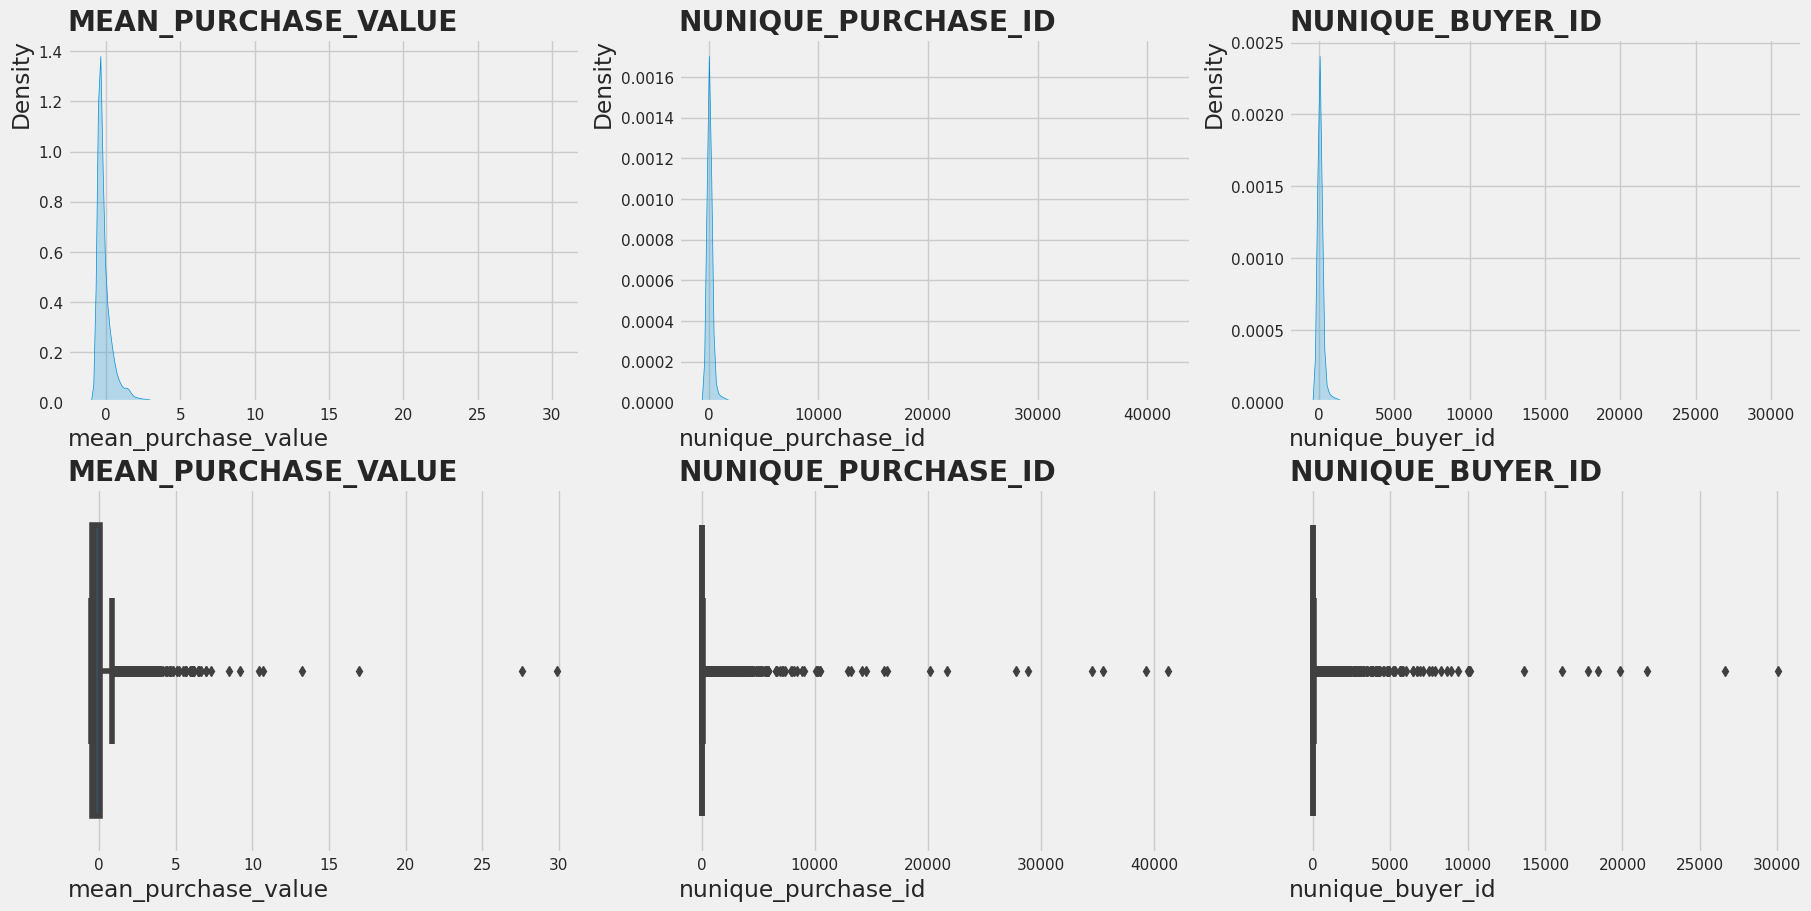

In [61]:
# inspect numerical distribution
numerical_plot(df_producer_purchases.iloc[:, 1:], hist=False)#, figsize=(15, 5))

In [62]:
# create a new column with nunique_buyer_id quantiles
df_producer_purchases["nunique_buyer_id_quantiles"] = pd.qcut(
    x=df_producer_purchases["nunique_buyer_id"], 
    q=10,
    labels=None, retbins=False, duplicates="drop"
)

# create a new column with nunique_buyer_id quantiles
df_producer_purchases["nunique_purchase_id_quantiles"] = pd.qcut(
    x=df_producer_purchases["nunique_purchase_id"], 
    q=10,
    labels=None, retbins=False, duplicates="drop"
)

# inspect results
df_producer_purchases[[
    "nunique_purchase_id", "nunique_purchase_id_quantiles", 
    "nunique_buyer_id", "nunique_buyer_id_quantiles"
    ]].sample(10, random_state=7)

nunique_purchase_id nunique_purchase_id_quantiles  nunique_buyer_id   
3622                   12                   (9.0, 17.0]                 2  \
2261                   14                   (9.0, 17.0]                14   
2606                   20                  (17.0, 34.0]                18   
2305                    3                    (2.0, 3.0]                 3   
2768                    1                  (0.999, 2.0]                 1   
7912                    4                    (3.0, 5.0]                 4   
3700                    3                    (2.0, 3.0]                 3   
1995                    4                    (3.0, 5.0]                 4   
433                   226                 (80.4, 276.2]               211   
3640                  155                 (80.4, 276.2]               142   

     nunique_buyer_id_quantiles  
3622               (0.999, 2.0]  
2261                (8.0, 16.0]  
2606               (16.0, 30.0]  
2305                 (2.0, 3.0]  
2768               (0.999, 2.0]  
7912                 (3.0, 5.0]  
3700                 (2.0, 3.0]  
1995                 (3.0, 5.0]  
433               (72.0, 232.0]  
3640              (72.0, 232.0]  

[10 rows x 4 columns]

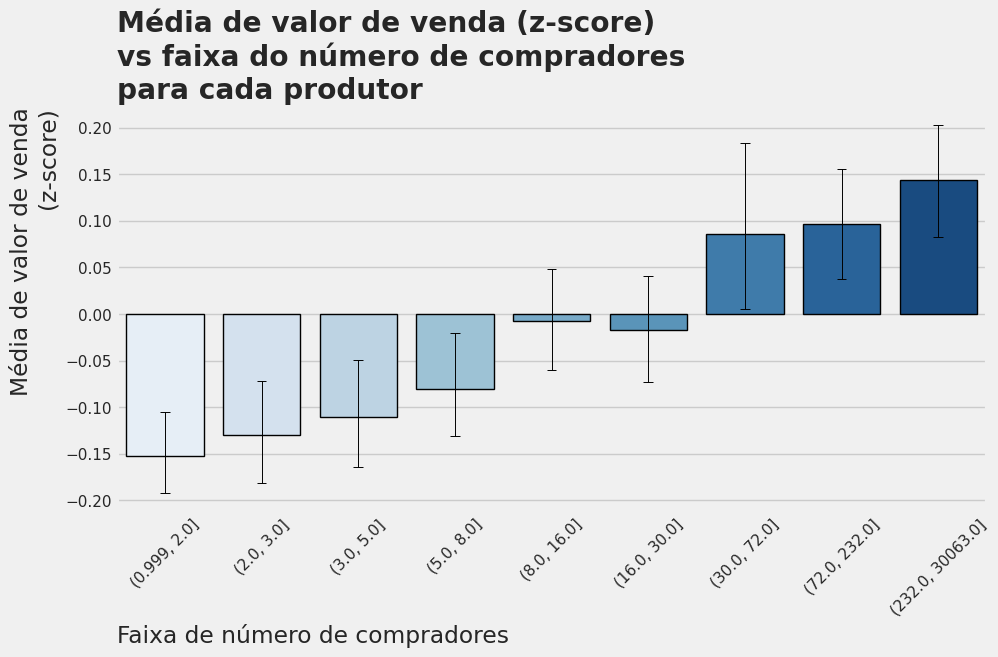

In [63]:
# plot a bar chart
sns.barplot(
    data=df_producer_purchases, x="nunique_buyer_id_quantiles", y="mean_purchase_value",
    estimator="mean", errorbar=("ci", 95), n_boot=1000,
    errcolor="0.0", errwidth=0.7, capsize=0.1,
    linewidth=1, edgecolor=".0",
    palette="Blues"
    )
# plot details
plt.title("Média de valor de venda (z-score)\nvs faixa do número de compradores\npara cada produtor")
plt.ylabel("Média de valor de venda\n(z-score)")
plt.xlabel("Faixa de número de compradores")
plt.xticks(rotation=45)

# save figure
plt.savefig(
    os.path.join(PROJECT_ROOT_PATH, "img", "hypothesis_validation", "h1", "mean_purchase_value_vs_nunique_buyer_id_quantiles.png"), 
    facecolor="white", bbox_inches="tight"
    );

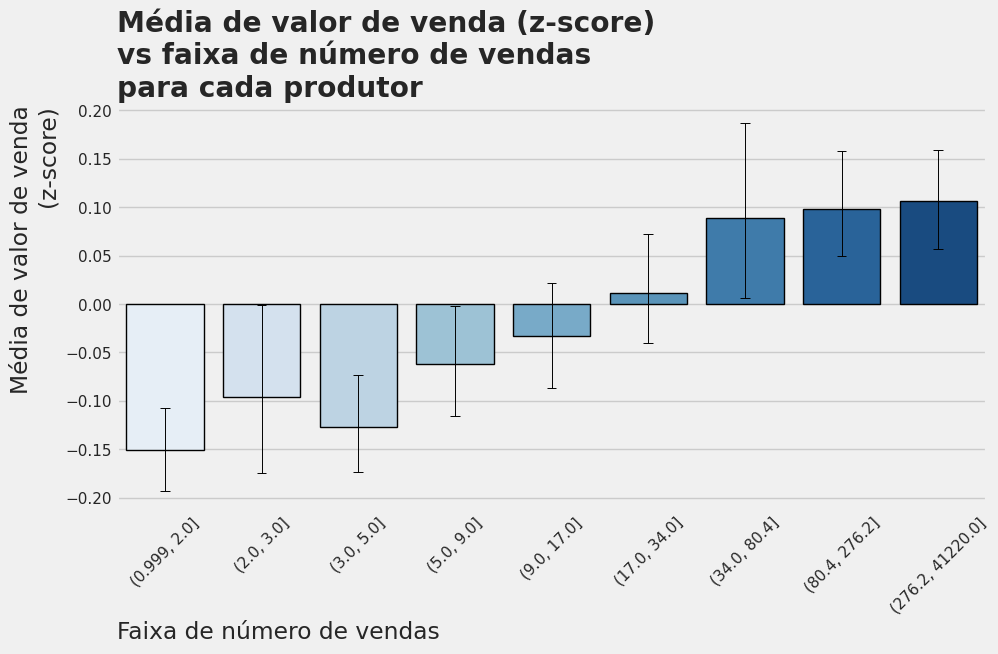

In [64]:
# plot a bar chart
sns.barplot(
    data=df_producer_purchases, x="nunique_purchase_id_quantiles", y="mean_purchase_value",
    estimator="mean", errorbar=("ci", 95), n_boot=1000,
    errcolor="0.0", errwidth=0.7, capsize=0.1,
    linewidth=1, edgecolor=".0",
    palette="Blues"
    )
# plot details
plt.title("Média de valor de venda (z-score)\nvs faixa de número de vendas\npara cada produtor")
plt.ylabel("Média de valor de venda\n(z-score)")
plt.xlabel("Faixa de número de vendas")
plt.xticks(rotation=45)

# save figure
plt.savefig(
    os.path.join(PROJECT_ROOT_PATH, "img", "hypothesis_validation", "h1", "mean_purchase_value_vs_nunique_purchase_id_quantiles.png"), 
    facecolor="white", bbox_inches="tight"
    );

In [65]:
# delete previous section dataframe to save memory
lst = [df_producer_purchases]
del lst
del df_producer_purchases

## **H2.** Are there any **relevant patterns or trends** in the data?
        - Check for features (correlation between features, feature distributions and time-changes trends) that shows patterns in terms of customers/producers groups or revenue impact or scaling impact.


In [66]:
# inspect dataframe
df_eda.head()

purchase_id  product_id  affiliate_id  producer_id  buyer_id   
0      1663958        6640        209372       116238   1200397  \
1      1677087        2350        141418         2821   1083764   
2      2017360       35669        618642       618642   1436106   
3      2017379       57998       1164511        70388   1436118   
4      2017382       58329       1261488       221253   1386357   

        purchase_date product_creation_date product_category   
0 2016-06-26 12:00:00   2011-03-19 15:47:36            Video  \
1 2016-06-26 12:00:00   2010-07-05 01:50:15          Podcast   
2 2016-06-26 12:00:00   2012-06-13 02:59:37          Podcast   
3 2016-06-26 12:00:00   2013-05-07 08:51:31          Podcast   
4 2016-06-26 12:00:00   2013-05-12 08:12:06          Podcast   

         product_niche  purchase_value  affiliate_commission_percentual   
0  Presentation skills            -0.3                              0.0  \
1     Child psychology            -0.2                              0.0   
2  Presentation skills            -0.5                              0.0   
3   Anxiety management            -0.4                              0.0   
4     Teaching English            -0.5                              0.0   

  purchase_device  is_origin_page_social_network  product_age_when_purchased   
0        Smart TV                           True                          63  \
1        Smart TV                           True                          71   
2        Smart TV                           True                          48   
3        Smart TV                           True                          37   
4        Smart TV                           True                          37   

  binned_affiliate_commission_percentual binned_product_age_when_purchased   
0                                [0, 10)                          [60, 70)  \
1                                [0, 10)                          [70, 80)   
2                                [0, 10)                          [40, 50)   
3                                [0, 10)                          [30, 40)   
4                                [0, 10)                          [30, 40)   

  purchase_date_daily  
0          2016-06-26  
1          2016-06-26  
2          2016-06-26  
3          2016-06-26  
4          2016-06-26  

[5 rows x 17 columns]

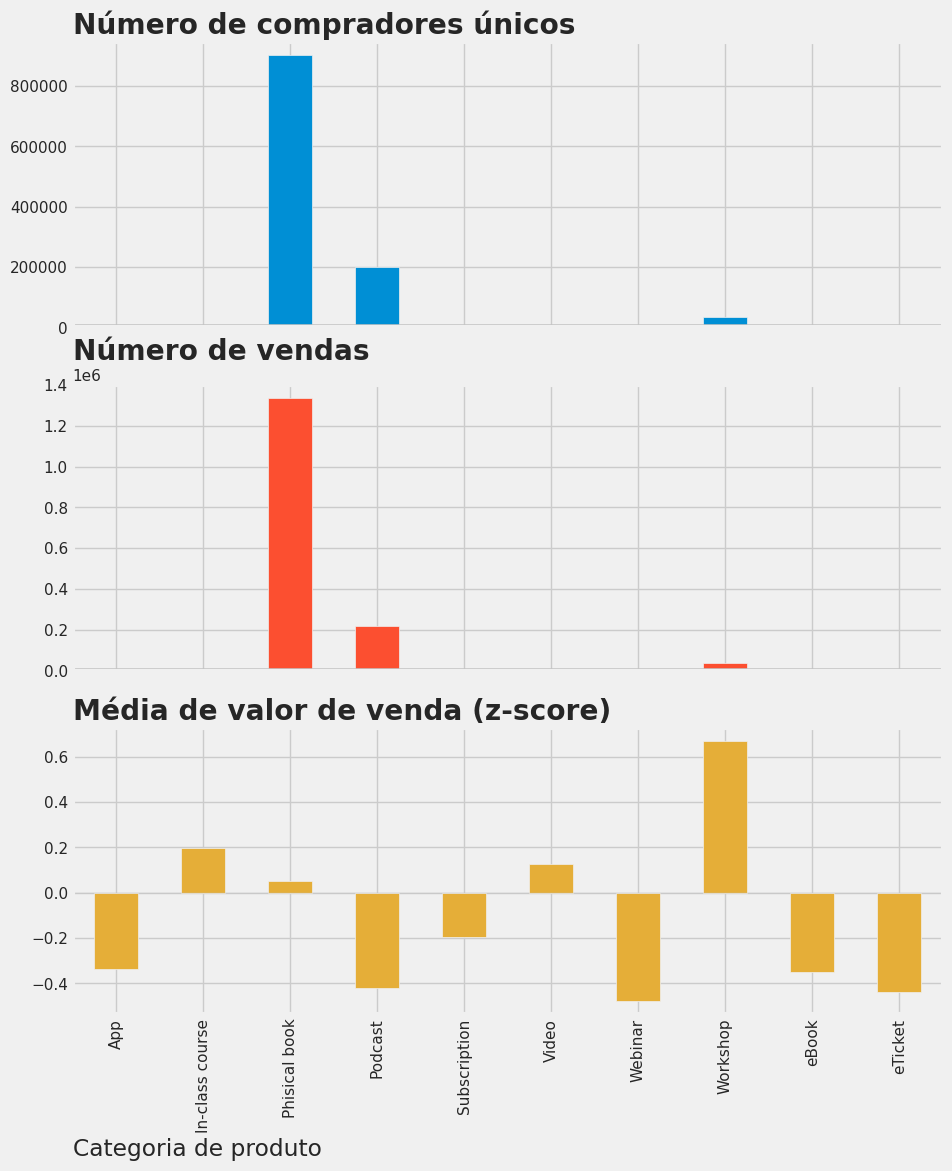

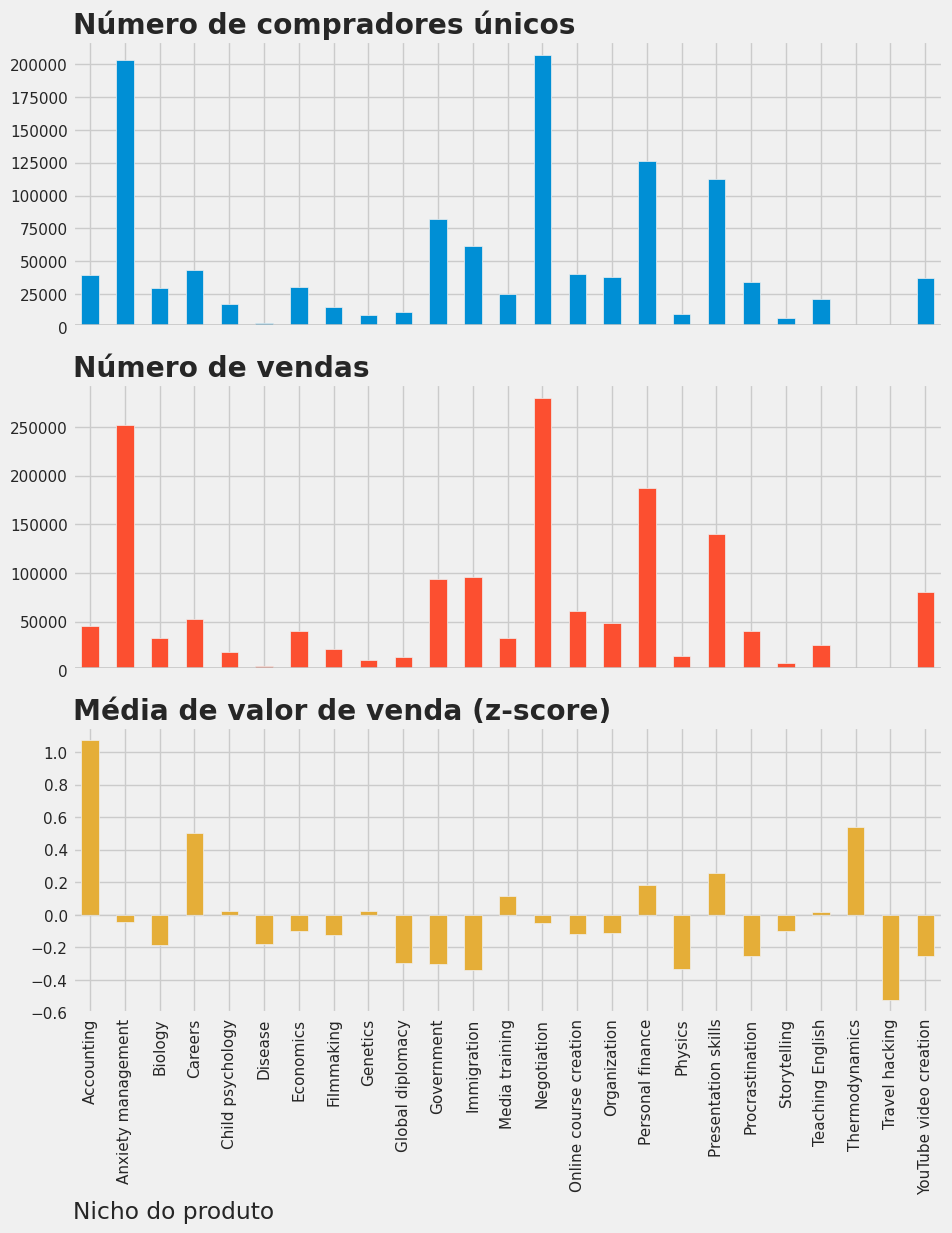

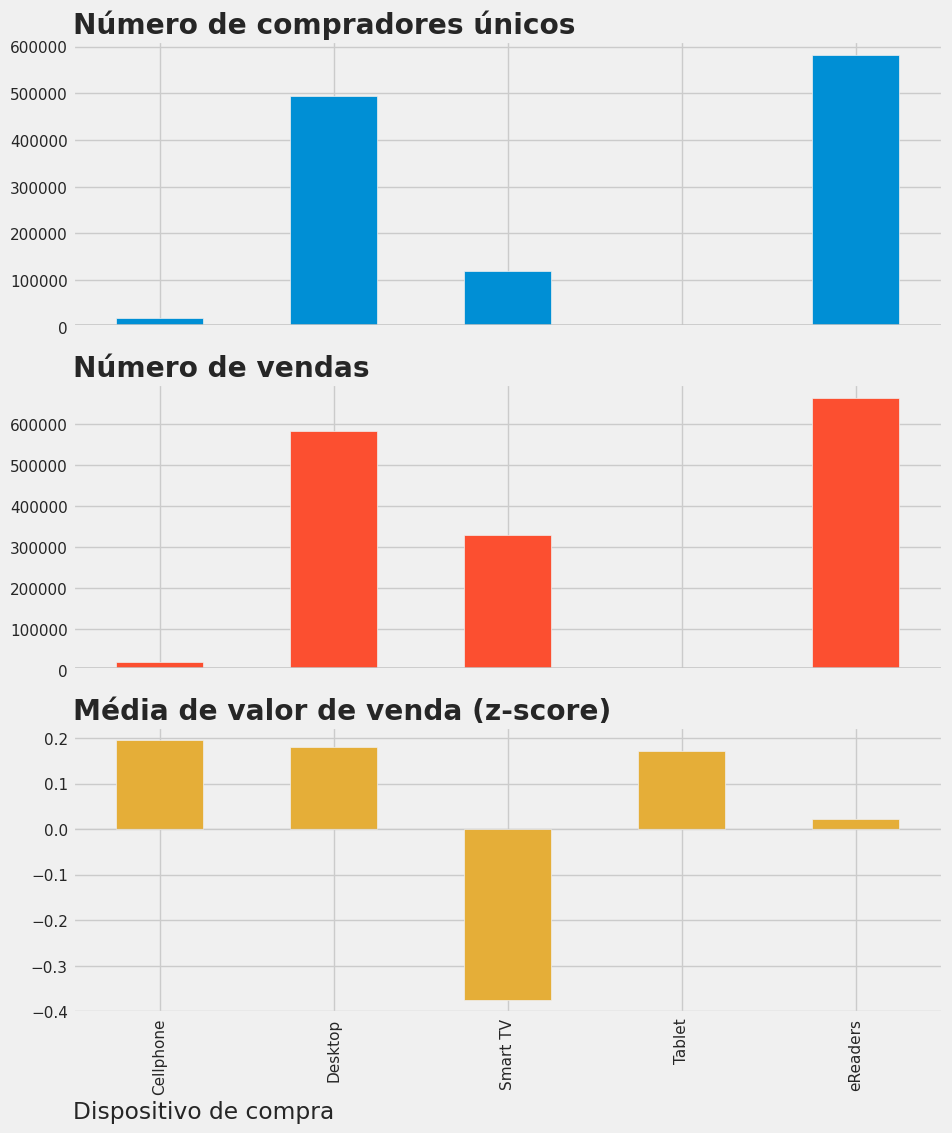

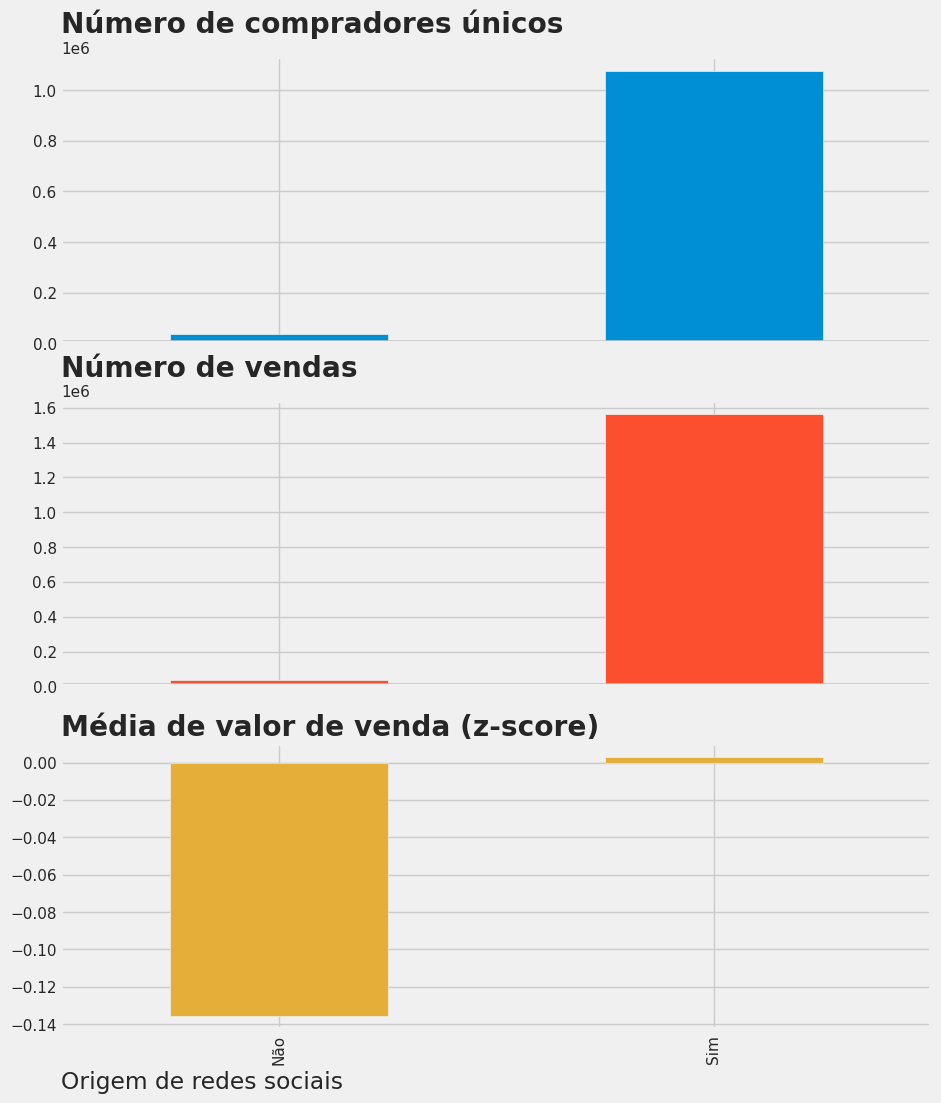

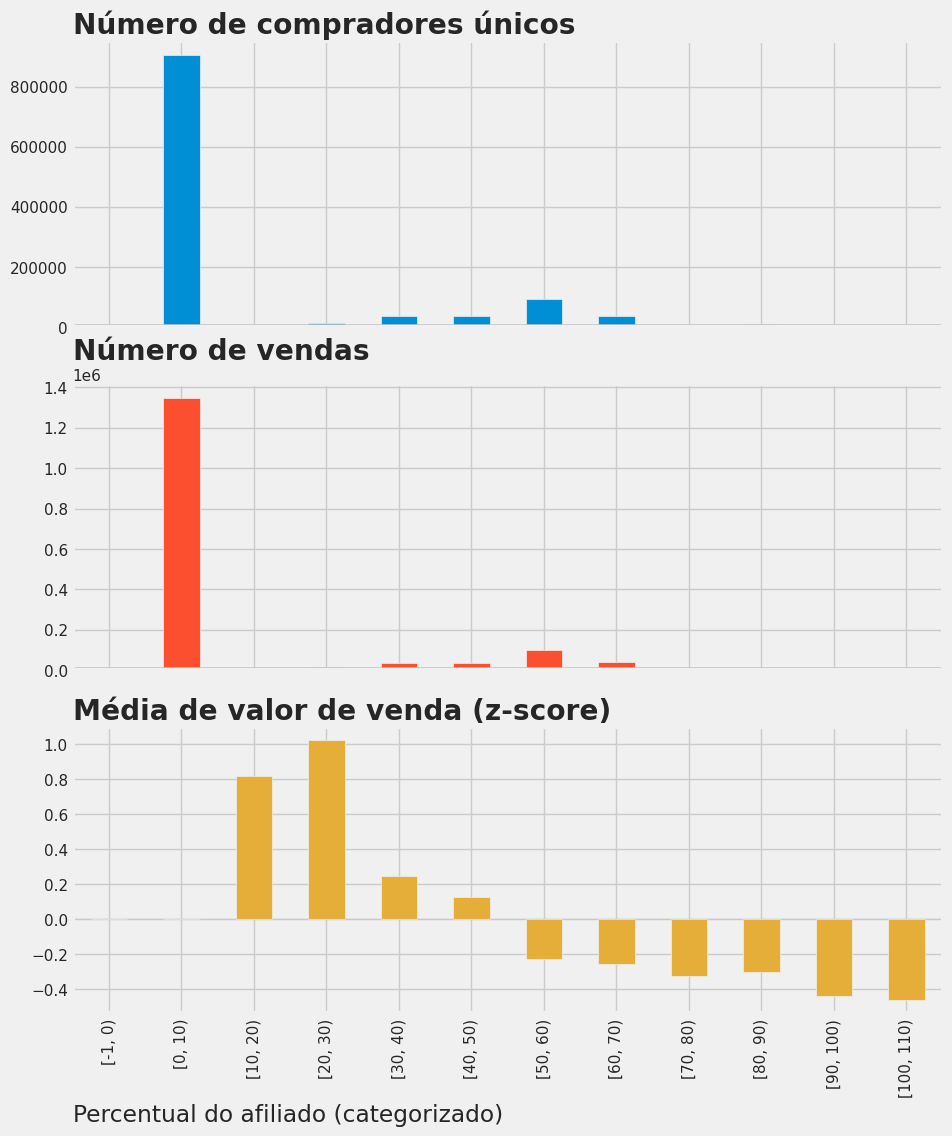

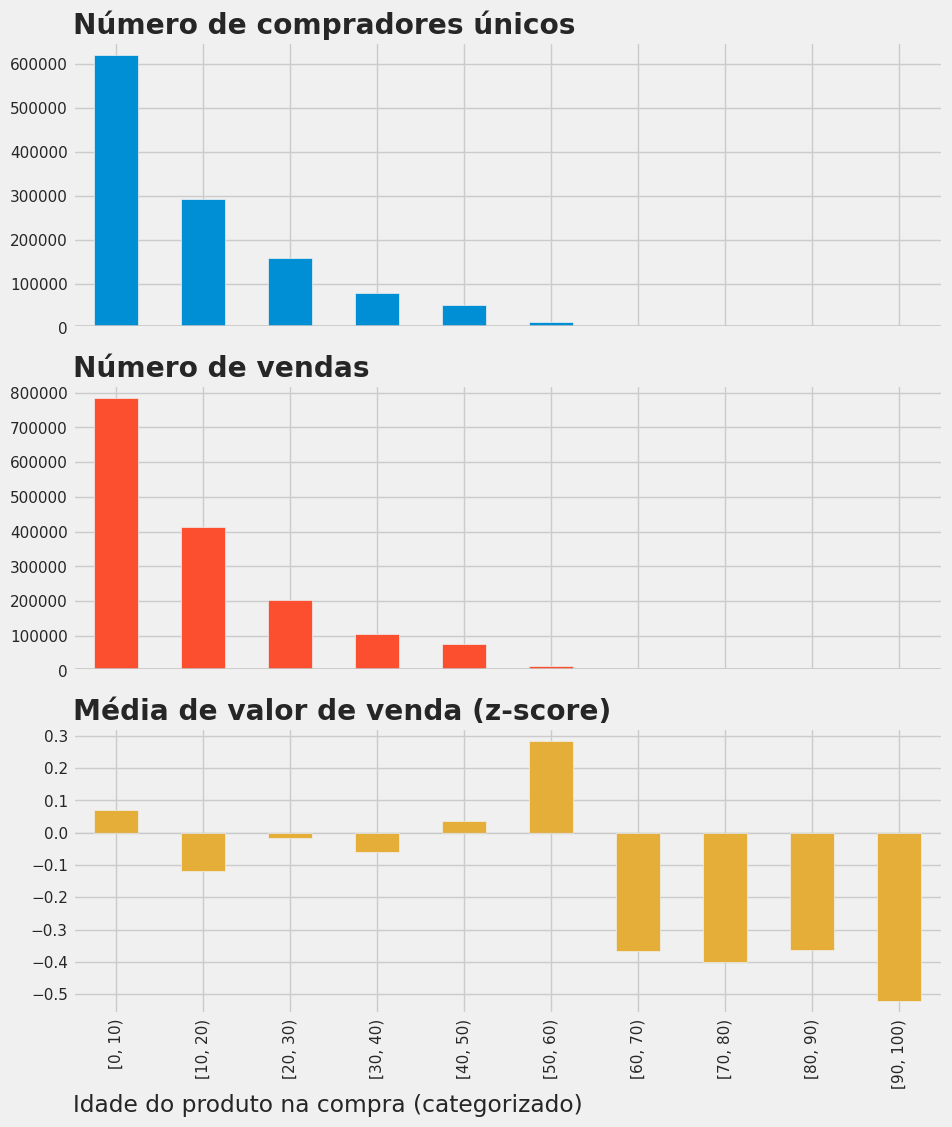

In [67]:
# define a mapping dict for plot
plot_map = dict(
    product_category="Categoria de produto", 
    product_niche="Nicho do produto", 
    purchase_device="Dispositivo de compra", 
    is_origin_page_social_network="Origem de redes sociais",
    binned_affiliate_commission_percentual="Percentual do afiliado (categorizado)", 
    binned_product_age_when_purchased="Idade do produto na compra (categorizado)"
)

# iterate over columns to plot
for feature in [
    "product_category", "product_niche", 
    "purchase_device", "is_origin_page_social_network",
    "binned_affiliate_commission_percentual", "binned_product_age_when_purchased"
    ]:
    # group data by feature and calculate meaningful aggregations for the analysis
    df_product_category_group = df_eda.groupby(
        by=feature, as_index=False).agg(
        nunique_buyer_id = ("buyer_id", "nunique"),
        nunique_purchase_id = ("purchase_id", "nunique"),
        mean_purchase_value = ("purchase_value", "mean"),
    )

    # check if feature column is boolean
    if df_product_category_group[feature].dtypes == "bool":
        # map feature values
        df_product_category_group[feature] = df_product_category_group[feature].map({True:"Sim", False:"Não"})

    # plot feature in respect to nunique_buyer_id, nunique_purchase_id and sum_purchase_value
    ax_nunique_buyer_id, ax_nunique_purchase_id, ax_mean_purchase_value = df_product_category_group.plot.bar(
        x=feature, subplots=True, figsize=(10, 12), 
        legend=False, grid=True, 
        xlabel=plot_map[feature],
        title=["Número de compradores únicos", "Número de vendas", "Média de valor de venda (z-score)"], 
        )
    # define plot details
    #Axis.get_figure(ax_mean_purchase_value).suptitle(plot_map[feature].upper())
    ax_nunique_buyer_id.axhline(y=0, c="Silver")
    ax_nunique_purchase_id.axhline(y=0, c="Silver")
    ax_mean_purchase_value.axhline(y=0, c="Silver", linewidth=0.2)    

    # save figure
    plt.savefig(
        os.path.join(PROJECT_ROOT_PATH, "img", "hypothesis_validation", "h2", f"{plot_map[feature].lower().replace(' ', '_')}.png"), 
        facecolor="white", bbox_inches="tight"
        )

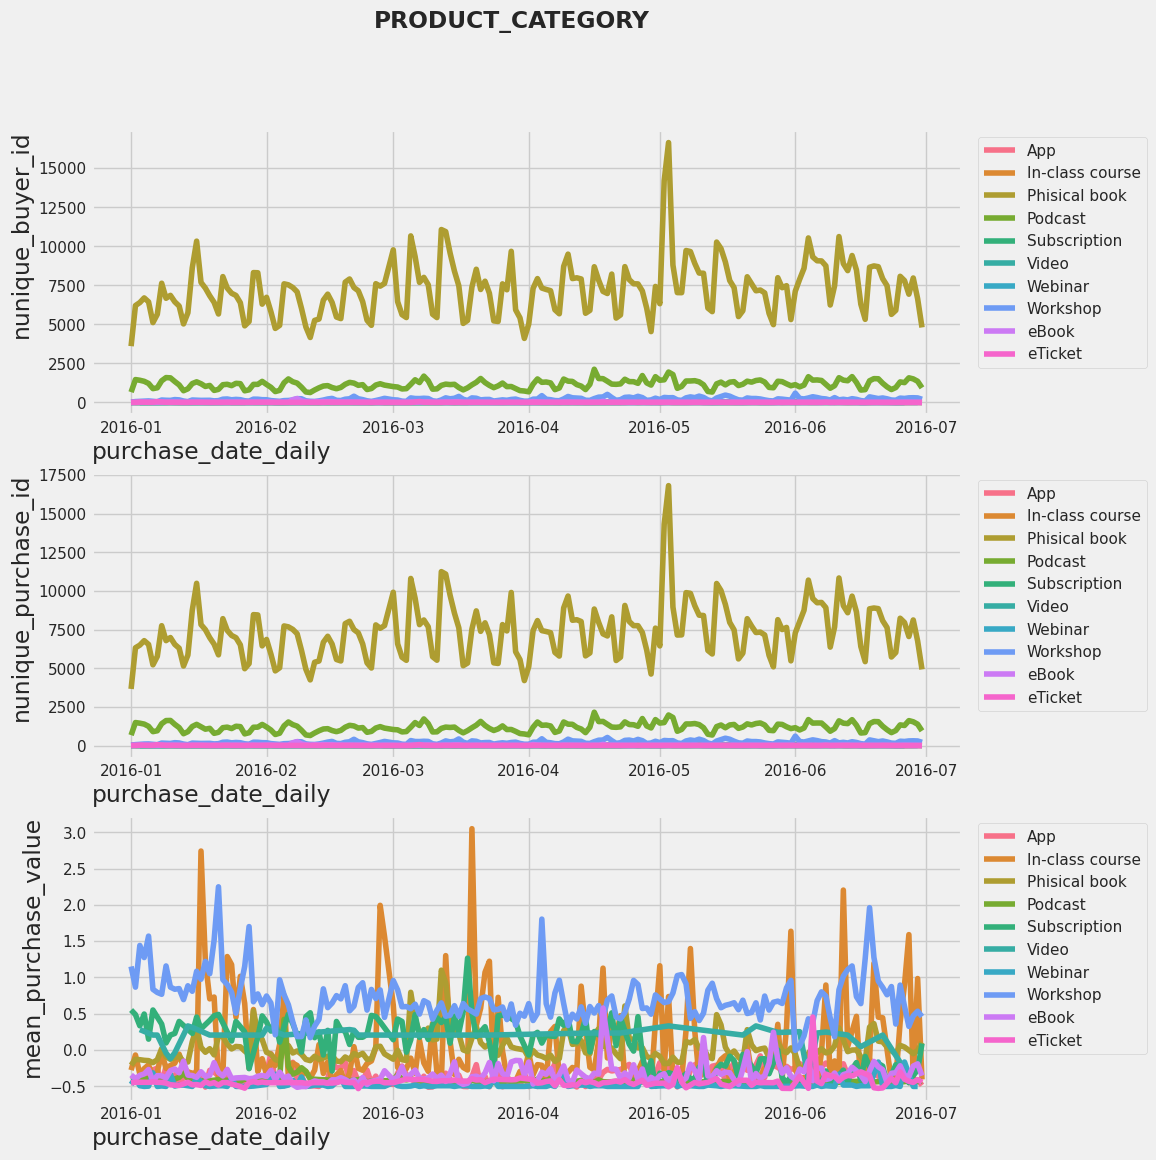

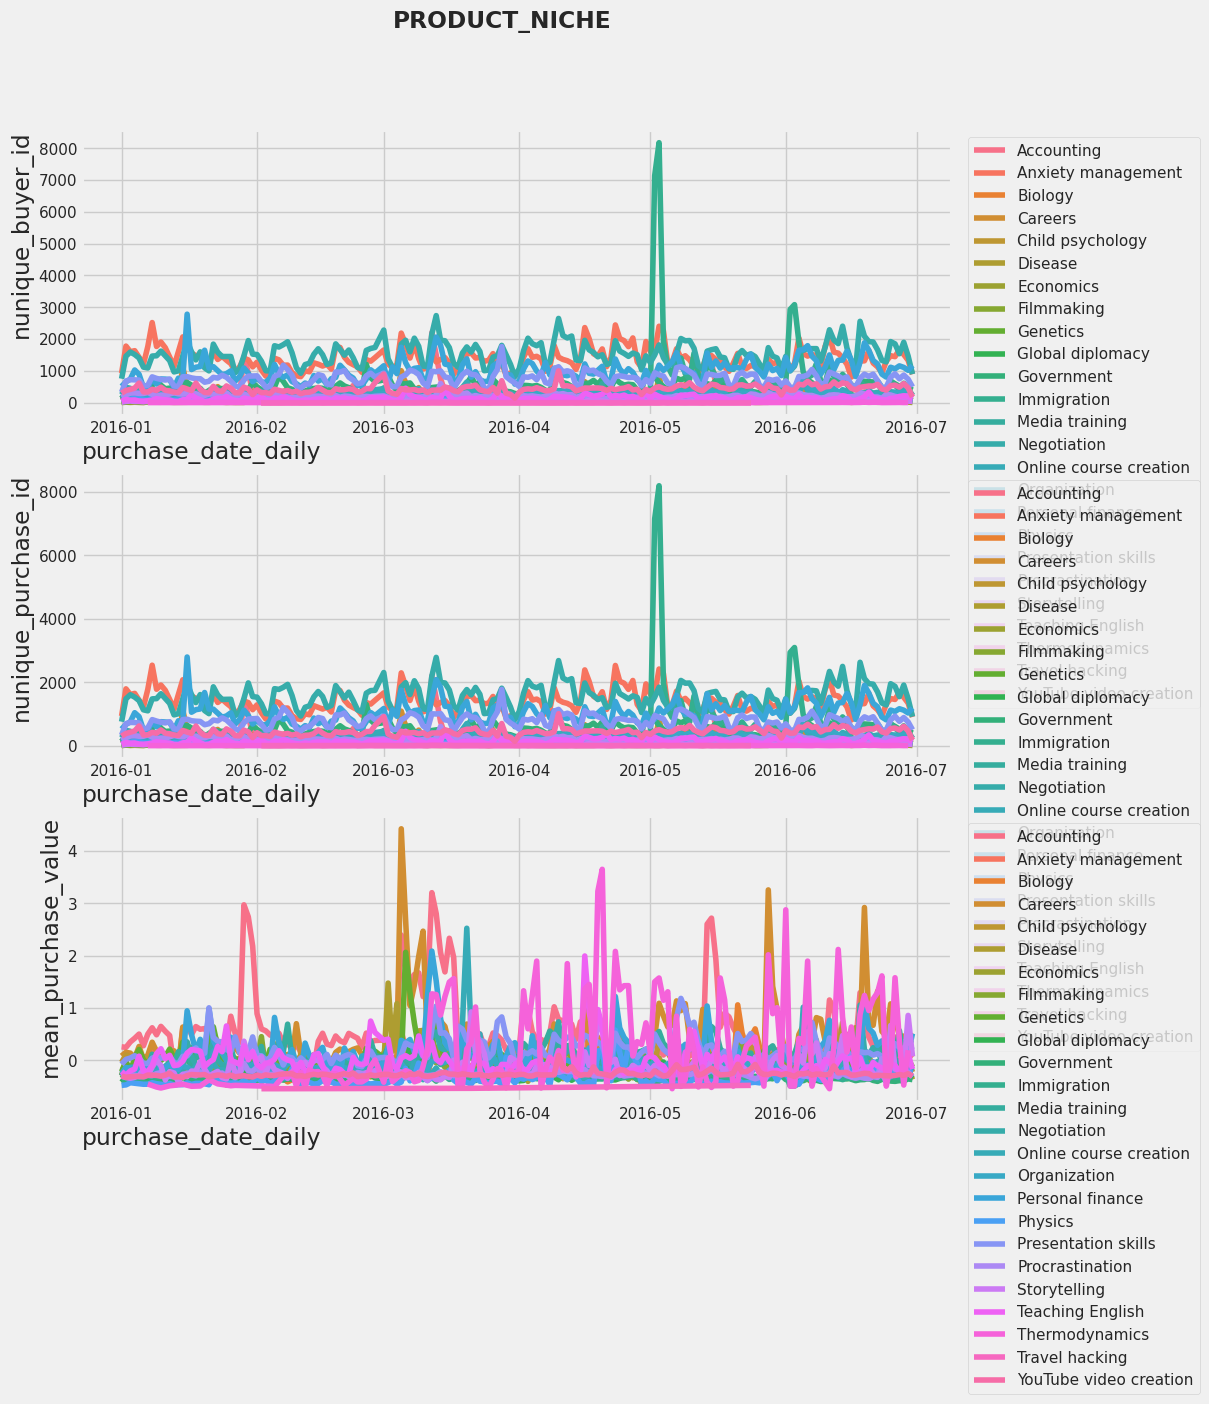

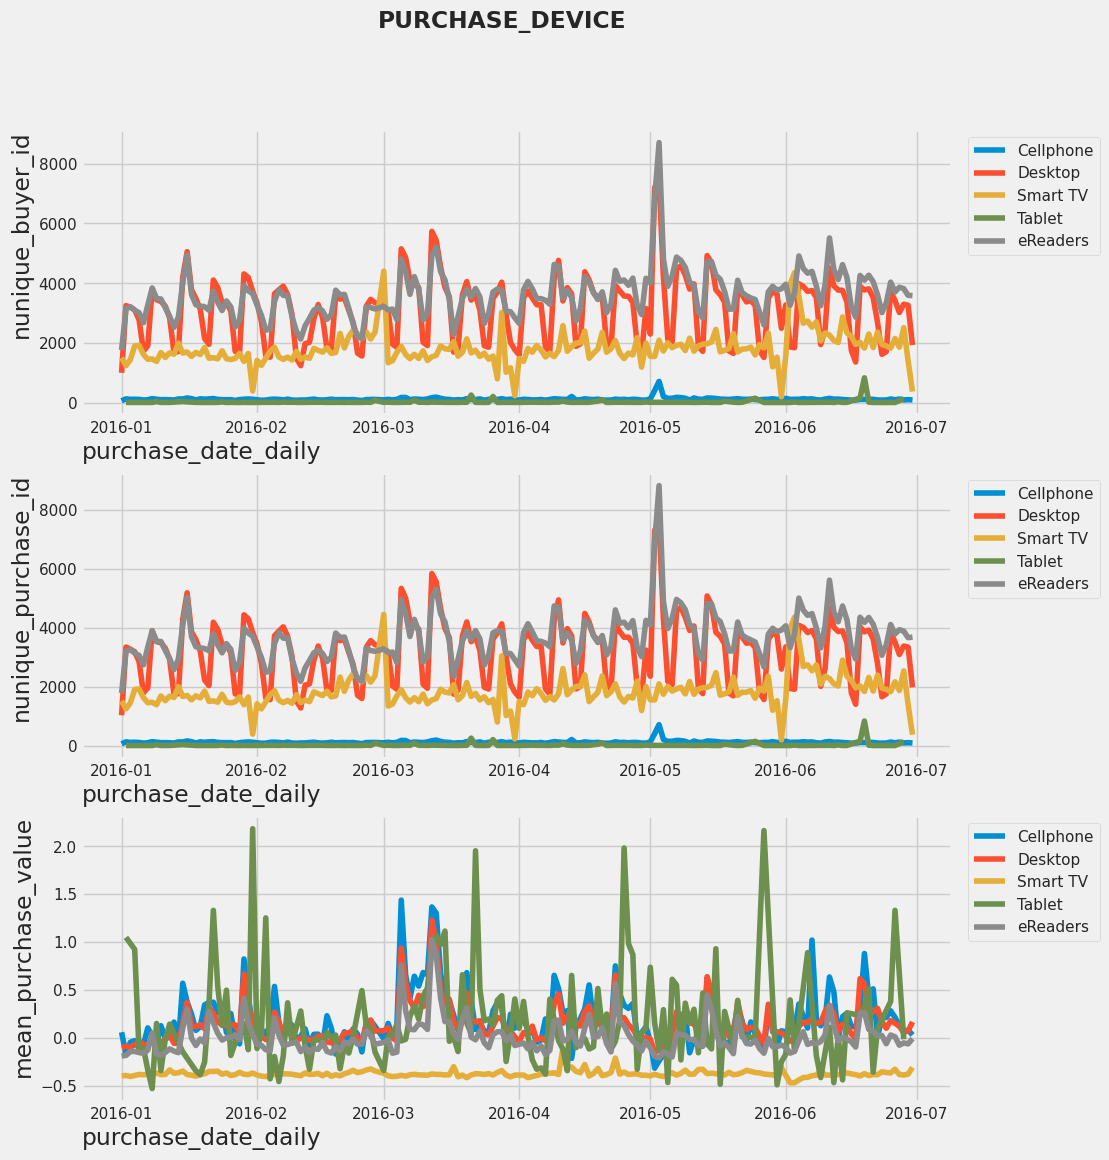

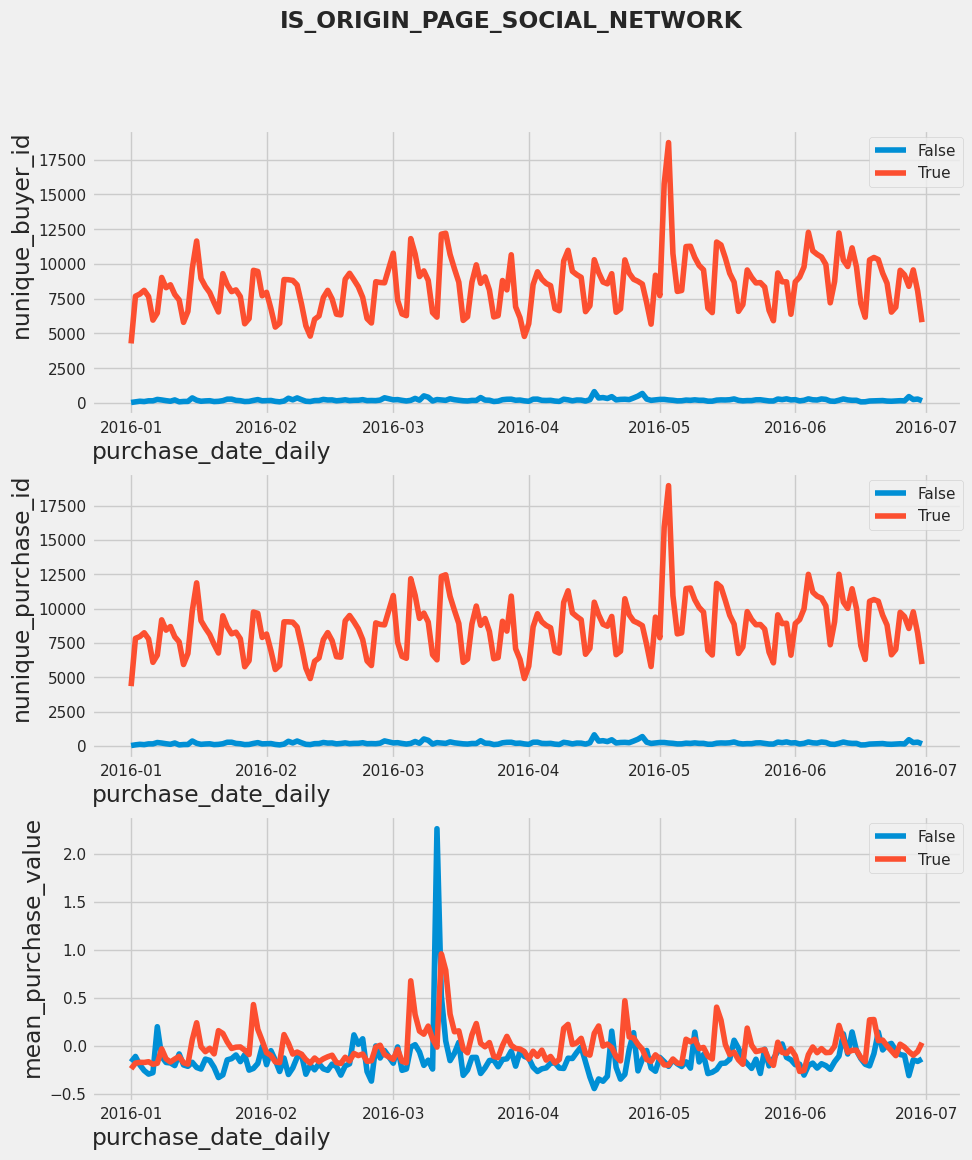

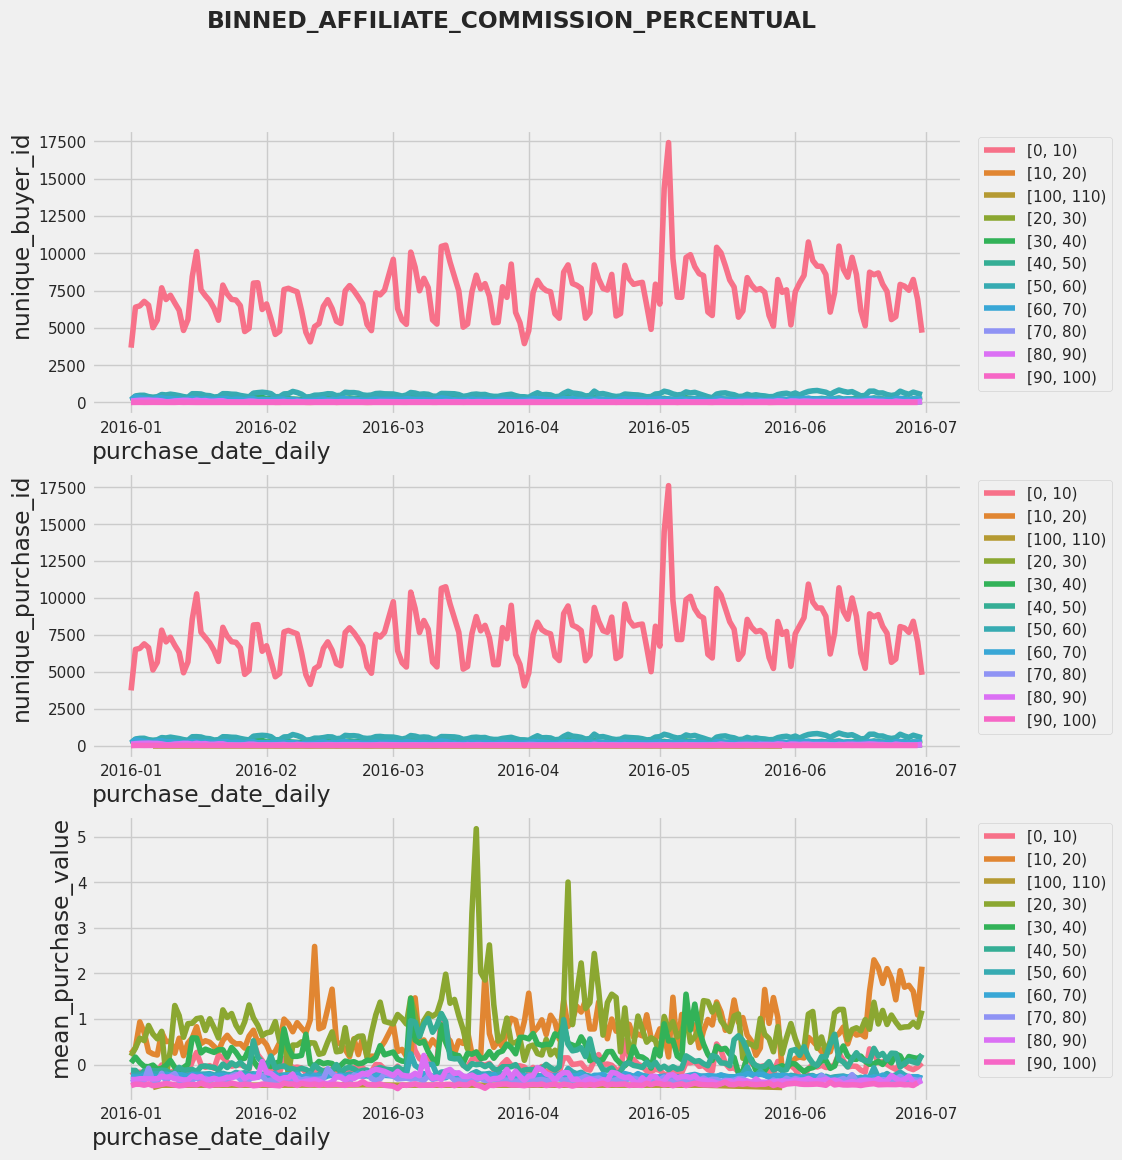

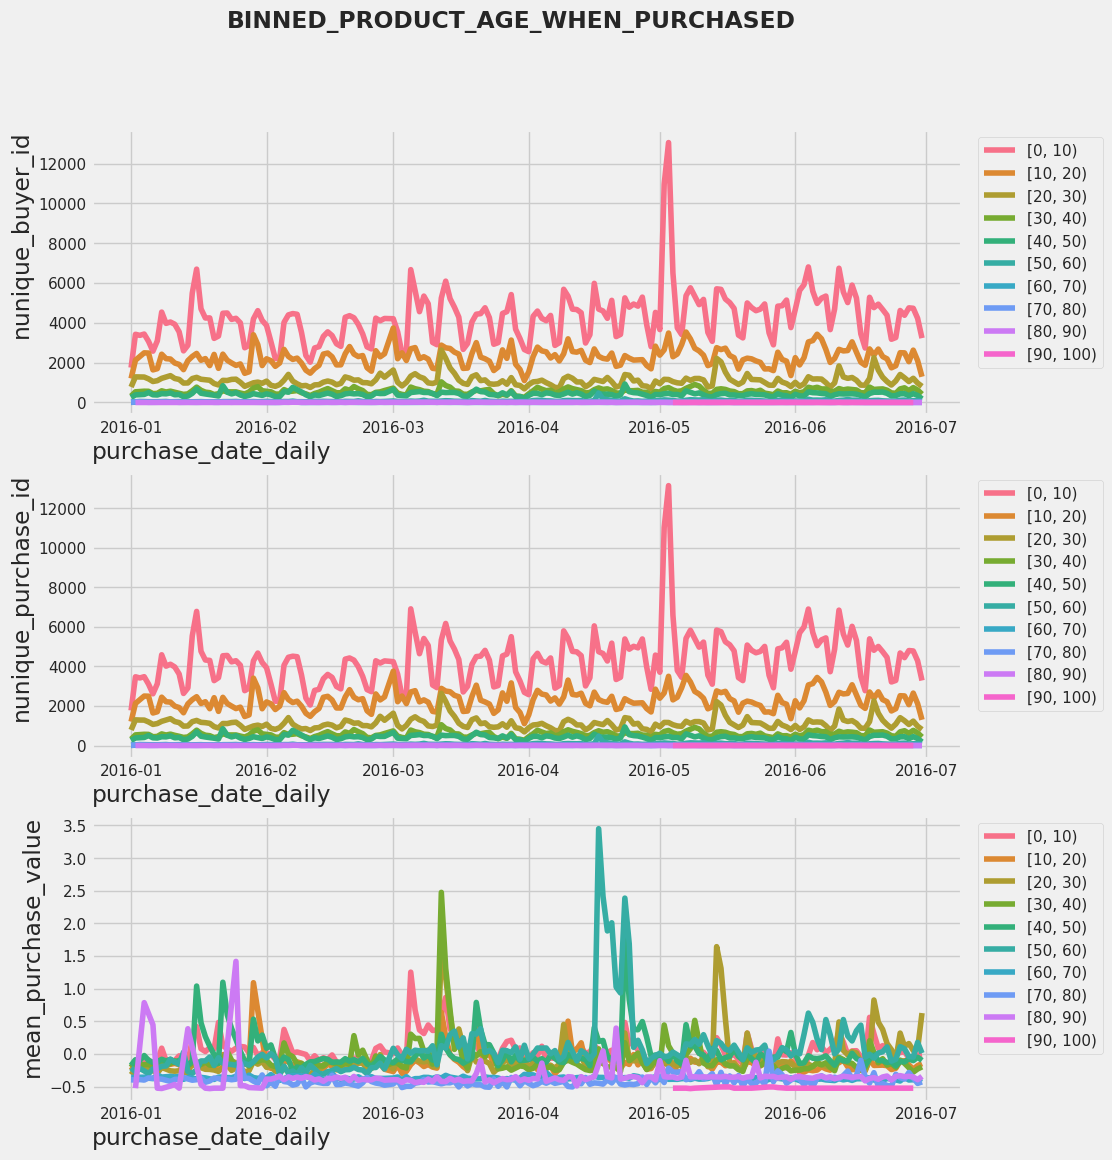

In [68]:
# iterate over columns to plot
for feature in [
    "product_category", "product_niche", "purchase_device", "is_origin_page_social_network",
    "binned_affiliate_commission_percentual", "binned_product_age_when_purchased"
    ]:

    # check if feature is categorical
    if feature in ("binned_affiliate_commission_percentual", "binned_product_age_when_purchased"):
        # convert categorical to string
        dtype_convert = {feature: "str"}
    # feature is not categorical
    else:
        # not need to convert
        dtype_convert = {}

    # define figure layout
    fig, axs = plt.subplots(nrows=3, ncols=1, figsize=(10,12))

    # define figure title
    fig.suptitle(feature.upper())

    # group data by feature and calculate meaningful aggregations for the analysis
    df_product_category_group = df_eda.astype(dtype_convert).groupby(
        by=[feature, "purchase_date_daily"], as_index=False).agg(
        nunique_buyer_id = ("buyer_id", "nunique"),
        nunique_purchase_id = ("purchase_id", "nunique"),
        mean_purchase_value = ("purchase_value", "mean"),
    )

    # iterate over target variables for subplots
    for idx, target in enumerate(["nunique_buyer_id", "nunique_purchase_id", "mean_purchase_value"]):
        # plot a line on subplot
        sns.lineplot(
            data=df_product_category_group, 
            x="purchase_date_daily", 
            y=target, 
            hue=feature,
            ax=axs[idx])
        # define legend position
        axs[idx].legend(bbox_to_anchor=(1.01, 1))
    
    # display
    plt.show()

In [69]:
# delete previous section dataframe to save memory
lst = [df_product_category_group]
del lst
del df_product_category_group

## **H3.** It is possible to **segment users** based on their characteristics (revenue, product niche, etc.)?
        - What is the purpose of segmenting customers?
          - Find out what are the best customers and what coould be done to change the behaviour of the not-best ones. 
          - Revenue from best customer could support scaling efforts.
        - Check for features that can cluster customer/producers for better revenue undestanding
          - Initially try RFM (Recency-Frequency-Monetary)


In [70]:
# get latest purchase date
latest_purchase_date = df_eda["purchase_date"].max()
# print report
print(
    f"Latest purchase data on dataframe: {latest_purchase_date}"
)

# group data by customer and aggregate required column to create RFM score
df_rfm = df_eda.groupby(by="buyer_id", as_index=False).agg(
    # ======= Recency ======= #
    # Create Recency feature -> time interval to the last purchase.
    # Once the dataframe is outdated, recency will be calculated 
    # with respect to the most recent date
    latest_customer_purchase = ("purchase_date", "max"),
    # ======= Frequency ======= #
    # create Frequency feature -> how many times the customer made a purchase
    frequency = ("purchase_id", "nunique"),
    # ======= Monetary =======#
    # create Monetary -> total spent by customer
    # 🚨 ! remember that purchase_value is on Z-scale -> positive and/or negative values ! 🚨
    monetary = ("purchase_value", "mean"),
)

# get how many day between customer latest purchase date and data collection
df_rfm["recency"] = (latest_purchase_date - df_rfm["latest_customer_purchase"]).dt.days
# create a constant column with latest_customer_purchase
df_rfm["db_latest_purchase_date"] = latest_purchase_date

# get shape before reshaping
shape_before=df_rfm.shape

# reorder columns
df_rfm = df_rfm[["buyer_id", "db_latest_purchase_date", "latest_customer_purchase",
                 "frequency", "monetary", "recency"]]

# sanity check
assert df_rfm.shape == shape_before, "Error when reordering columns!"

# inspect results
summary_statistics(df_rfm)
df_rfm.sample(10, random_state=7)

Latest purchase data on dataframe: 2016-06-30 23:59:57


Statistics for Numerical Variables [NaNs are ignored]:


buyer_id db_latest_purchase_date latest_customer_purchase  frequency   
235923   3986598     2016-06-30 23:59:57      2016-02-17 14:51:40          2  \
681031   6790559     2016-06-30 23:59:57      2016-03-15 06:32:01          1   
745630   6932504     2016-06-30 23:59:57      2016-04-02 19:40:42          1   
327371   5217195     2016-06-30 23:59:57      2016-05-15 21:35:12          3   
361280   5603505     2016-06-30 23:59:57      2016-01-02 11:22:50          1   
881820   7215990     2016-06-30 23:59:57      2016-05-04 12:55:32          1   
220309   3768236     2016-06-30 23:59:57      2016-06-09 01:05:18          1   
213704   3654303     2016-06-30 23:59:57      2016-02-14 16:20:34          1   
733480   6904431     2016-06-30 23:59:57      2016-03-30 23:52:43          1   
276468   4553161     2016-06-30 23:59:57      2016-05-22 17:14:09          2   

        monetary  recency  
235923      -0.4      134  
681031      -0.4      107  
745630      -0.5       89  
327371      -0.3       46  
361280      -0.4      180  
881820       0.5       57  
220309      -0.5       21  
213704      -0.4      137  
733480      -0.5       92  
276468      -0.2       39  

[10 rows x 6 columns]

In [71]:
# define a dict to store RFM transformation
rfm_transform = {}

In [72]:
# get dataframe shape before feature engineering
shape_before = df_rfm.shape


#################
####### R #######
#################

# create R feature -> recency feature in a scale from 1 until 5
# R ---> the more recent, the better -> the SMALLER the recency, the better

# define R labels
r_labels = [5, 4, 3, 2, 1]

# calculate values to cut R into bins into discrete intervals.
recency_qcut = pd.qcut(x=df_rfm["recency"], q=5, 
                       labels=r_labels, # reverse order
                       retbins=True, 
                       precision=3, duplicates='raise')
# assgin R bins
df_rfm['R'] = recency_qcut[0].astype(int)
# save bins limits
rfm_transform["R"] = {
    "func": "pd.qcut",
    "right": True, 
    "bins": recency_qcut[1],
    "labels": r_labels
    }


#################
####### M #######
#################

# create M feature -> monetary feature in a scale from 1 until 5
# M ---> the more monetary, the better -> the HIGHER the monetary, the better

# define M labels
m_labels = [1, 2, 3, 4, 5]

# calculate values to cut M into bins into discrete intervals.
monetary_qcut = pd.qcut(x=df_rfm["monetary"], q=5, 
                        labels=m_labels, 
                        retbins=True, 
                        precision=3, duplicates='raise')
# assgin M bins
df_rfm['M'] = monetary_qcut[0].astype(int)
# save bins limits
rfm_transform["M"] = {
    "func": "pd.qcut",
    "right": True, 
    "bins": monetary_qcut[1],
    "labels": m_labels
    }


# sanity check
assert (df_rfm.shape[0] == shape_before[0]) & ((df_rfm.shape[1] == shape_before[1] +2)), "Misleading feature engineering processing!"

# set 4 decimals to be display
with pd.option_context('display.float_format', lambda x: f'{x:,.4f}'):
    # inspect results
    display(
        rfm_transform, 
        df_rfm.sample(20, random_state=7)
        )

{'R': {'func': 'pd.qcut',
  'right': True,
  'bins': array([  0.,  25.,  57.,  94., 136., 181.]),
  'labels': [5, 4, 3, 2, 1]},
 'M': {'func': 'pd.qcut',
  'right': True,
  'bins': array([-0.54124   , -0.453015  , -0.359158  , -0.148169  ,  0.31437118,
         66.881135  ]),
  'labels': [1, 2, 3, 4, 5]}}

buyer_id db_latest_purchase_date latest_customer_purchase  frequency   
235923   3986598     2016-06-30 23:59:57      2016-02-17 14:51:40          2  \
681031   6790559     2016-06-30 23:59:57      2016-03-15 06:32:01          1   
745630   6932504     2016-06-30 23:59:57      2016-04-02 19:40:42          1   
327371   5217195     2016-06-30 23:59:57      2016-05-15 21:35:12          3   
361280   5603505     2016-06-30 23:59:57      2016-01-02 11:22:50          1   
881820   7215990     2016-06-30 23:59:57      2016-05-04 12:55:32          1   
220309   3768236     2016-06-30 23:59:57      2016-06-09 01:05:18          1   
213704   3654303     2016-06-30 23:59:57      2016-02-14 16:20:34          1   
733480   6904431     2016-06-30 23:59:57      2016-03-30 23:52:43          1   
276468   4553161     2016-06-30 23:59:57      2016-05-22 17:14:09          2   
481830   6082392     2016-06-30 23:59:57      2016-01-23 14:32:32          1   
995014   7455058     2016-06-30 23:59:57      2016-06-02 15:05:16          1   
913364   7277945     2016-06-30 23:59:57      2016-05-11 07:19:22          1   
663731   6757282     2016-06-30 23:59:57      2016-03-12 11:59:45          1   
377908   5766721     2016-06-30 23:59:57      2016-03-06 23:17:43          1   
23960     435425     2016-06-30 23:59:57      2016-02-14 13:31:55          1   
542430   6486506     2016-06-30 23:59:57      2016-02-06 23:23:27          1   
898025   7247267     2016-06-30 23:59:57      2016-05-08 00:20:17          1   
528883   6436364     2016-06-30 23:59:57      2016-02-03 00:51:52          1   
520761   6324136     2016-06-30 23:59:57      2016-02-15 21:21:41          1   

        monetary  recency  R  M  
235923   -0.3581      134  2  3  
681031   -0.3592      107  2  2  
745630   -0.5225       89  3  1  
327371   -0.2590       46  4  3  
361280   -0.4155      180  1  2  
881820    0.5175       57  4  5  
220309   -0.4891       21  5  1  
213704   -0.4100      137  1  2  
733480   -0.5394       92  3  1  
276468   -0.2121       39  4  3  
481830    0.3917      159  1  5  
995014   -0.4662       28  4  1  
913364   -0.1096       50  4  4  
663731    3.4436      110  2  5  
377908   -0.1386      116  2  4  
23960    -0.3554      137  1  3  
542430   -0.5039      145  1  1  
898025    0.4485       53  4  5  
528883   -0.1849      148  1  3  
520761    0.1088      136  2  4  

[20 rows x 8 columns]

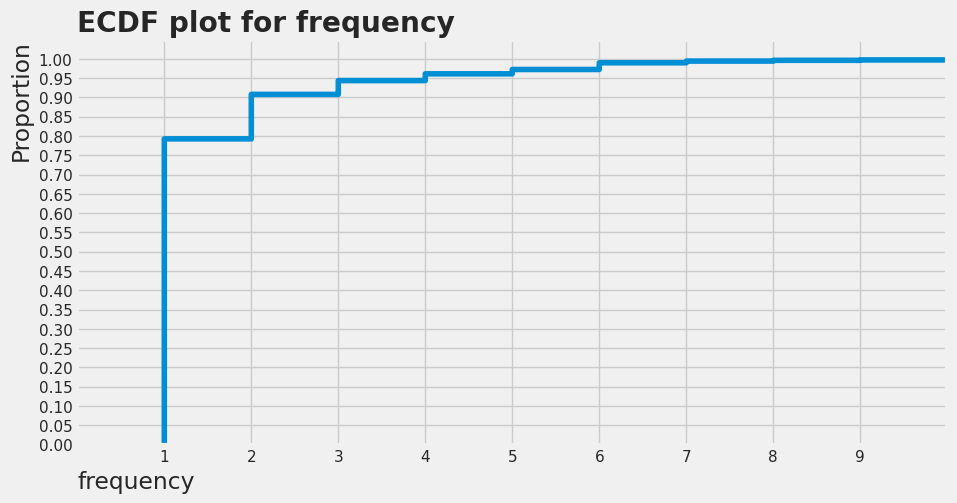

In [73]:
# inspect frequancy
sns.ecdfplot(data=df_rfm, x="frequency", stat="proportion")
# plot details
plt.ylim(0, 1.05)
plt.title("ECDF plot for frequency")
plt.xlim(0, 10)
plt.xticks([*range(1, 10)])
plt.yticks([i/100 for i in range(0, 101, 5)]);

In [74]:
# define quantiles to inspect
q = [0.5, 0.8] + [i/100 for i in range(90, 101)]
# iterate over quantiles to inspect
for q_ in q:
    # print report
    print(
        f'Frequency quantile {q_:.2f} = {df_rfm["frequency"].quantile(q=q_, interpolation="linear"):.0f}'
    )

Frequency quantile 0.50 = 1
Frequency quantile 0.80 = 2
Frequency quantile 0.90 = 2
Frequency quantile 0.91 = 3
Frequency quantile 0.92 = 3
Frequency quantile 0.93 = 3
Frequency quantile 0.94 = 3
Frequency quantile 0.95 = 4
Frequency quantile 0.96 = 4
Frequency quantile 0.97 = 5
Frequency quantile 0.98 = 6
Frequency quantile 0.99 = 7
Frequency quantile 1.00 = 66


In [75]:
#################
####### F #######
#################

# create F feature -> frequency feature in a scale from 1 until 5
# F ---> the more frequency, the better -> the HIGHER the frequency, the better


# Frequency -> there are many quantiles have same frequency values
# it is a problem if we try to split into this quantiles.
# As frequency distribution is skew -> split using business understanding, not quantiles/percentiles

# mapping frequency values into F customer 'labels'
# F = 1 if: frequency = 1
# F = 2 if:  1 < frequency <= 2
# F = 3 if:  2 < frequency <= 4
# F = 4 if:  4 < frequency <= 7 
# F = 5 if:  frequency > 7
# create bins of the mapping
m_bins = [ 0, 1, 2, 4, 7, 100 ]
# create labels of the mapping
m_labels = [1, 2, 3, 4, 5]
# calculate values to cut F into bins into discrete intervals.
frequency_cut = pd.cut( 
    x=df_rfm['frequency'], 
    bins=m_bins, labels=m_labels,
    right=True, retbins=True, include_lowest=False, ordered=True
    )
# map frequency feature into F feature
df_rfm['F'] = frequency_cut[0].tolist()
# save bins limits
rfm_transform['F'] = {
    "func": "pd.cut",
    "right": True, 
    "include_lowest": False, 
    "ordered": True,
    "bins": frequency_cut[1],
    "labels": m_labels
    }

# sanity check
assert len(df_rfm["F"].unique()) == 5, "Missing F label on preprocessing"

# set 4 decimals to be display
with pd.option_context('display.float_format', lambda x: f'{x:,.4f}'):
    # inspect results
    display(
        rfm_transform, 
        df_rfm[df_rfm["F"] >= 3].sample(10, random_state=1),
        df_rfm.sample(20, random_state=7),
        )

{'R': {'func': 'pd.qcut',
  'right': True,
  'bins': array([  0.,  25.,  57.,  94., 136., 181.]),
  'labels': [5, 4, 3, 2, 1]},
 'M': {'func': 'pd.qcut',
  'right': True,
  'bins': array([-0.54124   , -0.453015  , -0.359158  , -0.148169  ,  0.31437118,
         66.881135  ]),
  'labels': [1, 2, 3, 4, 5]},
 'F': {'func': 'pd.cut',
  'right': True,
  'include_lowest': False,
  'ordered': True,
  'bins': array([  0,   1,   2,   4,   7, 100]),
  'labels': [1, 2, 3, 4, 5]}}

buyer_id db_latest_purchase_date latest_customer_purchase  frequency   
176976   3042910     2016-06-30 23:59:57      2016-06-26 01:02:44          5  \
203929   3499148     2016-06-30 23:59:57      2016-06-24 16:11:16          5   
52325     901924     2016-06-30 23:59:57      2016-06-08 14:12:01          6   
207789   3558406     2016-06-30 23:59:57      2016-06-08 17:01:30          6   
19374     351426     2016-06-30 23:59:57      2016-06-14 17:30:08          4   
357903   5569308     2016-06-30 23:59:57      2016-06-29 13:41:38          6   
470887   6060492     2016-06-30 23:59:57      2016-06-06 01:17:21          5   
546748   6495569     2016-06-30 23:59:57      2016-06-14 22:02:37          8   
234468   3966195     2016-06-30 23:59:57      2016-06-10 16:13:33          3   
716817   6867895     2016-06-30 23:59:57      2016-06-25 15:26:45          4   

        monetary  recency  R  M  F  
176976   -0.3167        4  5  3  4  
203929   -0.4983        6  5  1  4  
52325    -0.5131       22  5  1  4  
207789   -0.3028       22  5  3  4  
19374    -0.2567       16  5  3  3  
357903   -0.5039        1  5  1  4  
470887   -0.4303       24  5  2  4  
546748   -0.5101       16  5  1  5  
234468    0.2104       20  5  4  3  
716817   -0.4663        5  5  1  3  

[10 rows x 9 columns]

buyer_id db_latest_purchase_date latest_customer_purchase  frequency   
235923   3986598     2016-06-30 23:59:57      2016-02-17 14:51:40          2  \
681031   6790559     2016-06-30 23:59:57      2016-03-15 06:32:01          1   
745630   6932504     2016-06-30 23:59:57      2016-04-02 19:40:42          1   
327371   5217195     2016-06-30 23:59:57      2016-05-15 21:35:12          3   
361280   5603505     2016-06-30 23:59:57      2016-01-02 11:22:50          1   
881820   7215990     2016-06-30 23:59:57      2016-05-04 12:55:32          1   
220309   3768236     2016-06-30 23:59:57      2016-06-09 01:05:18          1   
213704   3654303     2016-06-30 23:59:57      2016-02-14 16:20:34          1   
733480   6904431     2016-06-30 23:59:57      2016-03-30 23:52:43          1   
276468   4553161     2016-06-30 23:59:57      2016-05-22 17:14:09          2   
481830   6082392     2016-06-30 23:59:57      2016-01-23 14:32:32          1   
995014   7455058     2016-06-30 23:59:57      2016-06-02 15:05:16          1   
913364   7277945     2016-06-30 23:59:57      2016-05-11 07:19:22          1   
663731   6757282     2016-06-30 23:59:57      2016-03-12 11:59:45          1   
377908   5766721     2016-06-30 23:59:57      2016-03-06 23:17:43          1   
23960     435425     2016-06-30 23:59:57      2016-02-14 13:31:55          1   
542430   6486506     2016-06-30 23:59:57      2016-02-06 23:23:27          1   
898025   7247267     2016-06-30 23:59:57      2016-05-08 00:20:17          1   
528883   6436364     2016-06-30 23:59:57      2016-02-03 00:51:52          1   
520761   6324136     2016-06-30 23:59:57      2016-02-15 21:21:41          1   

        monetary  recency  R  M  F  
235923   -0.3581      134  2  3  2  
681031   -0.3592      107  2  2  1  
745630   -0.5225       89  3  1  1  
327371   -0.2590       46  4  3  3  
361280   -0.4155      180  1  2  1  
881820    0.5175       57  4  5  1  
220309   -0.4891       21  5  1  1  
213704   -0.4100      137  1  2  1  
733480   -0.5394       92  3  1  1  
276468   -0.2121       39  4  3  2  
481830    0.3917      159  1  5  1  
995014   -0.4662       28  4  1  1  
913364   -0.1096       50  4  4  1  
663731    3.4436      110  2  5  1  
377908   -0.1386      116  2  4  1  
23960    -0.3554      137  1  3  1  
542430   -0.5039      145  1  1  1  
898025    0.4485       53  4  5  1  
528883   -0.1849      148  1  3  1  
520761    0.1088      136  2  4  1  

[20 rows x 9 columns]

In [76]:
# calculate mean RFM for each customer
df_rfm['avg_RFM'] = df_rfm[['R', 'F', 'M']].mean(axis = 1)

# inspect results
check_dataframe(df_rfm, summary_stats=True, size=10)

*************************************************
Dataframe size in memory: 88.052 MB 

-----------------------------
Dataframe overview:


-----------------------------

 Dataframe shape is (1100649, 10) 

-----------------------------


Statistics for Numerical Variables [NaNs are ignored]:


-----------------------------


dataframe.sample(10)


buyer_id db_latest_purchase_date latest_customer_purchase  frequency   
666530    6762104     2016-06-30 23:59:57      2016-03-12 17:49:23          1  \
986363    7435340     2016-06-30 23:59:57      2016-05-31 00:18:16          1   
315740    5075113     2016-06-30 23:59:57      2016-06-07 21:49:07          1   
1081871   7657054     2016-06-30 23:59:57      2016-06-25 16:24:16          1   
1015943   7503532     2016-06-30 23:59:57      2016-06-07 16:38:07          1   
444131    6010185     2016-06-30 23:59:57      2016-01-14 19:36:29          1   
504068    6129751     2016-06-30 23:59:57      2016-01-29 16:35:59          1   
375854    5746993     2016-06-30 23:59:57      2016-06-27 13:35:25          6   
1040671   7558963     2016-06-30 23:59:57      2016-06-13 17:14:21          1   
792993    7036118     2016-06-30 23:59:57      2016-04-14 11:22:51          1   

         monetary  recency  R  M  F  avg_RFM  
666530        0.3      110  2  5  1      2.7  
986363        3.2       30  4  5  1      3.3  
315740        0.2       23  5  4  1      3.3  
1081871       0.4        5  5  5  1      3.7  
1015943      -0.4       23  5  2  1      2.7  
444131       -0.4      168  1  2  1      1.3  
504068       -0.5      153  1  1  1      1.0  
375854       -0.5        3  5  1  4      3.3  
1040671      -0.5       17  5  1  1      2.3  
792993       -0.4       77  3  2  1      2.0  

[10 rows x 10 columns]

*************************************************


In [77]:
# add some noise to RFM so as to better visualize it
for col in ["R", "M", "F"]:
    # create a new column with a normal noise
    df_rfm[f"{col}_noisy"] = df_rfm[col] + np.random.normal(loc=0, scale=0.3, size=len(df_rfm))

# inspect results
df_rfm.sample(10, random_state=7)    

buyer_id db_latest_purchase_date latest_customer_purchase  frequency   
235923   3986598     2016-06-30 23:59:57      2016-02-17 14:51:40          2  \
681031   6790559     2016-06-30 23:59:57      2016-03-15 06:32:01          1   
745630   6932504     2016-06-30 23:59:57      2016-04-02 19:40:42          1   
327371   5217195     2016-06-30 23:59:57      2016-05-15 21:35:12          3   
361280   5603505     2016-06-30 23:59:57      2016-01-02 11:22:50          1   
881820   7215990     2016-06-30 23:59:57      2016-05-04 12:55:32          1   
220309   3768236     2016-06-30 23:59:57      2016-06-09 01:05:18          1   
213704   3654303     2016-06-30 23:59:57      2016-02-14 16:20:34          1   
733480   6904431     2016-06-30 23:59:57      2016-03-30 23:52:43          1   
276468   4553161     2016-06-30 23:59:57      2016-05-22 17:14:09          2   

        monetary  recency  R  M  F  avg_RFM  R_noisy  M_noisy  F_noisy  
235923      -0.4      134  2  3  2      2.3      1.5      3.3      1.8  
681031      -0.4      107  2  2  1      1.7      1.6      2.0      1.1  
745630      -0.5       89  3  1  1      1.7      3.0      0.7      1.0  
327371      -0.3       46  4  3  3      3.3      4.0      2.9      2.6  
361280      -0.4      180  1  2  1      1.3      0.6      2.1      0.9  
881820       0.5       57  4  5  1      3.3      4.0      5.4      1.1  
220309      -0.5       21  5  1  1      2.3      5.0      0.6      0.5  
213704      -0.4      137  1  2  1      1.3      0.8      2.2      0.8  
733480      -0.5       92  3  1  1      1.7      3.1      1.6      1.2  
276468      -0.2       39  4  3  2      3.0      3.8      3.0      1.8  

[10 rows x 13 columns]

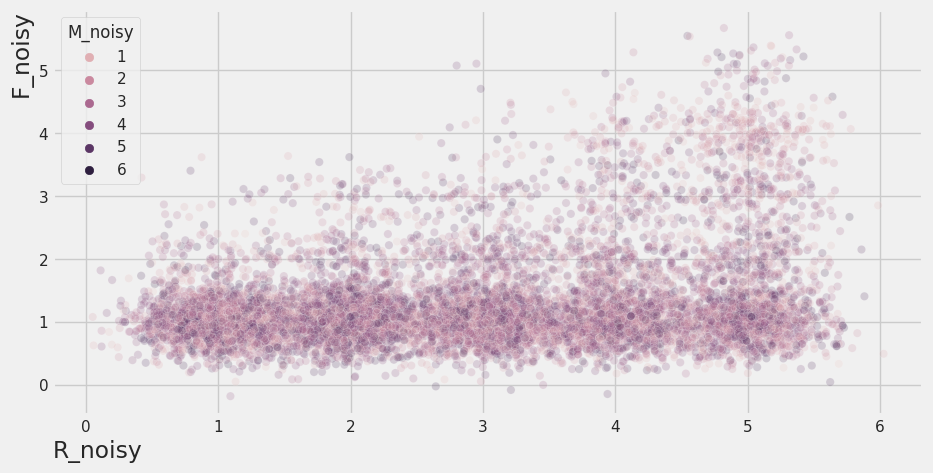

In [78]:
# visualy inspect clusters
sns.scatterplot(data=df_rfm.sample(10_000), 
                x="R_noisy", y="F_noisy", 
                hue="M_noisy", hue_order=[0, 1, 2, 3, 4],
                alpha=0.2);

In [79]:
# inspect dataframe
check_dataframe(df_rfm, summary_stats=True, size=1)

*************************************************
Dataframe size in memory: 114.468 MB 

-----------------------------
Dataframe overview:


-----------------------------

 Dataframe shape is (1100649, 13) 

-----------------------------


Statistics for Numerical Variables [NaNs are ignored]:


-----------------------------


dataframe.sample(1)


buyer_id db_latest_purchase_date latest_customer_purchase  frequency   
173816   2984400     2016-06-30 23:59:57      2016-03-08 00:36:35          1  \

        monetary  recency  R  M  F  avg_RFM  R_noisy  M_noisy  F_noisy  
173816      -0.2      114  2  3  1      2.0      2.1      3.1      0.8  

[1 rows x 13 columns]

*************************************************


In [80]:
###################
####### RFM #######
###################

# create RFM score -> rfm avg in a scale from 1 until 5
# RFM ---> the more score, the better -> the HIGHER the score, the better

# create bins of the mapping
rfm_bins = [ 0, 2, 3, 4, 5 ]
# create labels of the mapping ---> create 4 clusters
rfm_labels = (1, 2, 3, 4)

# calculate values to cut RFM into bins into discrete intervals.
rfm_cut = pd.cut( 
    x=df_rfm['avg_RFM'], 
    bins=rfm_bins, labels=rfm_labels,
    right=True, retbins=True, include_lowest=False, ordered=True
    )
# map frequency feature into F feature
df_rfm['cluster'] = rfm_cut[0].tolist()
# save bins limits
rfm_transform['RFM'] = {
    "func": "pd.cut",
    "right": True, 
    "include_lowest": False, 
    "ordered": True,
    "bins": rfm_cut[1],
    "labels": rfm_labels
    }


# sanity check
assert df_rfm["cluster"].nunique() == len(rfm_labels), "Missing clusters!"

# print transformations dict
display(rfm_transform)

# iterate over unique clusters
for c in [1, 2, 3, 4]:
    # inspect
    display(
        df_rfm.loc[df_rfm["cluster"]==c, ["avg_RFM", "cluster"]].sample(10, random_state=49)
        )

{'R': {'func': 'pd.qcut',
  'right': True,
  'bins': array([  0.,  25.,  57.,  94., 136., 181.]),
  'labels': [5, 4, 3, 2, 1]},
 'M': {'func': 'pd.qcut',
  'right': True,
  'bins': array([-0.54124   , -0.453015  , -0.359158  , -0.148169  ,  0.31437118,
         66.881135  ]),
  'labels': [1, 2, 3, 4, 5]},
 'F': {'func': 'pd.cut',
  'right': True,
  'include_lowest': False,
  'ordered': True,
  'bins': array([  0,   1,   2,   4,   7, 100]),
  'labels': [1, 2, 3, 4, 5]},
 'RFM': {'func': 'pd.cut',
  'right': True,
  'include_lowest': False,
  'ordered': True,
  'bins': array([0, 2, 3, 4, 5]),
  'labels': (1, 2, 3, 4)}}

avg_RFM  cluster
353078      1.7        1
621286      1.7        1
845956      2.0        1
479967      1.3        1
237507      2.0        1
74926       2.0        1
658694      1.7        1
980600      2.0        1
550061      1.3        1
47173       1.7        1

[10 rows x 2 columns]

avg_RFM  cluster
542924       2.3        2
879290       2.3        2
966462       3.0        2
210359       2.7        2
1090643      3.0        2
52085        2.7        2
955957       2.7        2
732757       2.7        2
595182       2.7        2
747698       3.0        2

[10 rows x 2 columns]

avg_RFM  cluster
1095455      3.7        3
500686       3.7        3
352354       3.3        3
44908        3.3        3
658616       3.3        3
319843       3.3        3
513881       3.3        3
887776       3.3        3
905735       4.0        3
101142       3.7        3

[10 rows x 2 columns]

avg_RFM  cluster
270486      4.3        4
336291      4.3        4
205144      4.3        4
654         4.3        4
521981      4.3        4
20649       4.3        4
98827       4.3        4
939275      4.3        4
86966       4.7        4
86119       4.3        4

[10 rows x 2 columns]

In [81]:
# inspect dataframe
check_dataframe(df_rfm, summary_stats=True)

*************************************************
Dataframe size in memory: 123.273 MB 

-----------------------------
Dataframe overview:


-----------------------------

 Dataframe shape is (1100649, 14) 

-----------------------------


Statistics for Numerical Variables [NaNs are ignored]:


-----------------------------


dataframe.sample(5)


buyer_id db_latest_purchase_date latest_customer_purchase  frequency   
449021   6019077     2016-06-30 23:59:57      2016-01-15 20:08:55          1  \
332431   5281619     2016-06-30 23:59:57      2016-06-24 13:41:37          5   
312354   5026616     2016-06-30 23:59:57      2016-06-24 18:28:06          1   
816359   7086383     2016-06-30 23:59:57      2016-04-20 06:20:48          1   
664879   6759051     2016-06-30 23:59:57      2016-03-12 13:42:14          1   

        monetary  recency  R  M  F  avg_RFM  R_noisy  M_noisy  F_noisy   
449021       0.5      167  1  5  1      2.3      1.0      4.9      0.5  \
332431      -0.3        6  5  3  4      4.0      5.0      2.9      4.0   
312354      -0.2        6  5  3  1      3.0      5.1      2.6      0.9   
816359      -0.3       71  3  3  1      2.3      3.1      3.2      1.0   
664879       2.8      110  2  5  1      2.7      2.4      5.0      1.2   

        cluster  
449021        2  
332431        3  
312354        2  
816359        2  
664879        2  

[5 rows x 14 columns]

*************************************************


In [82]:
# inspect transformation dict
rfm_transform

{'R': {'func': 'pd.qcut',
  'right': True,
  'bins': array([  0.,  25.,  57.,  94., 136., 181.]),
  'labels': [5, 4, 3, 2, 1]},
 'M': {'func': 'pd.qcut',
  'right': True,
  'bins': array([-0.54124   , -0.453015  , -0.359158  , -0.148169  ,  0.31437118,
         66.881135  ]),
  'labels': [1, 2, 3, 4, 5]},
 'F': {'func': 'pd.cut',
  'right': True,
  'include_lowest': False,
  'ordered': True,
  'bins': array([  0,   1,   2,   4,   7, 100]),
  'labels': [1, 2, 3, 4, 5]},
 'RFM': {'func': 'pd.cut',
  'right': True,
  'include_lowest': False,
  'ordered': True,
  'bins': array([0, 2, 3, 4, 5]),
  'labels': (1, 2, 3, 4)}}

In [83]:
# get cluster description
df_cluster = df_rfm.groupby(by="cluster", as_index=False).agg(
    cluster_avg_recency = ("recency", "mean"),
    cluster_avg_frequency = ("frequency", "mean"),
    cluster_avg_monetary = ("monetary", "mean"),
    cluster_size = ("buyer_id", "nunique")
)

# get info from cluster percent size
df_cluster['cluster_size_percent'] = ( df_cluster['cluster_size'] / df_cluster['cluster_size'].sum() ) * 100

# get RFM for clusters mean
df_cluster["clusters_r"] = [rfm_transform["R"]["labels"][idx_start_at_one-1] 
                            for idx_start_at_one in 
                            np.digitize(
                            x=df_cluster["cluster_avg_recency"], 
                            bins=rfm_transform["R"]["bins"], 
                            right=rfm_transform["R"]["right"]
                            )
                        ]
df_cluster["clusters_f"] = [rfm_transform["F"]["labels"][idx_start_at_one-1] 
                            for idx_start_at_one in 
                            np.digitize(
                            x=df_cluster["cluster_avg_frequency"], 
                            bins=rfm_transform["F"]["bins"], 
                            right=rfm_transform["F"]["right"]
                            )
                        ]
df_cluster["clusters_m"] = [rfm_transform["M"]["labels"][idx_start_at_one-1] 
                            for idx_start_at_one in 
                            np.digitize(
                            x=df_cluster["cluster_avg_monetary"], 
                            bins=rfm_transform["M"]["bins"], 
                            right=rfm_transform["M"]["right"]
                            )
                        ]

# create cluster RFM score
df_cluster["avg_RFM"] = df_cluster[['clusters_r', 'clusters_f', 'clusters_m']].mean(axis = 1)

# inspect results
display(
    rfm_transform,
    df_cluster
    )

{'R': {'func': 'pd.qcut',
  'right': True,
  'bins': array([  0.,  25.,  57.,  94., 136., 181.]),
  'labels': [5, 4, 3, 2, 1]},
 'M': {'func': 'pd.qcut',
  'right': True,
  'bins': array([-0.54124   , -0.453015  , -0.359158  , -0.148169  ,  0.31437118,
         66.881135  ]),
  'labels': [1, 2, 3, 4, 5]},
 'F': {'func': 'pd.cut',
  'right': True,
  'include_lowest': False,
  'ordered': True,
  'bins': array([  0,   1,   2,   4,   7, 100]),
  'labels': [1, 2, 3, 4, 5]},
 'RFM': {'func': 'pd.cut',
  'right': True,
  'include_lowest': False,
  'ordered': True,
  'bins': array([0, 2, 3, 4, 5]),
  'labels': (1, 2, 3, 4)}}

cluster  cluster_avg_recency  cluster_avg_frequency  cluster_avg_monetary   
0        1                120.5                    1.1                  -0.4  \
1        2                 69.6                    1.3                   0.2   
2        3                 25.9                    2.5                   0.6   
3        4                 13.3                    6.7                   0.5   

   cluster_size  cluster_size_percent  clusters_r  clusters_f  clusters_m   
0        396195                  36.0           2           2           2  \
1        511019                  46.4           3           2           4   
2        182199                  16.6           4           3           5   
3         11236                   1.0           5           4           5   

   avg_RFM  
0      2.0  
1      3.0  
2      4.0  
3      4.7  

[4 rows x 10 columns]

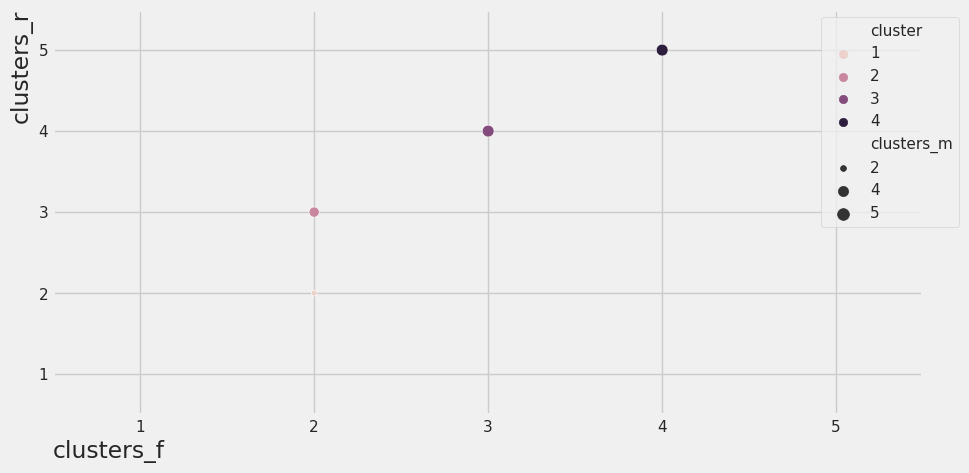

In [84]:
# plot average RFM for each cluster
sns.scatterplot(data = df_cluster, x = 'clusters_f', y = 'clusters_r', 
                size = 'clusters_m', hue = "cluster"
                )
# plot details
plt.legend(bbox_to_anchor=(1.05, 1))
plt.ylim(0.5, 5.5)
plt.xlim(0.5, 5.5);

In [85]:
# inspect clusters
display(df_cluster)

# give friendly name to clusters
df_cluster['cluster_name'] = df_cluster['cluster'].map({
    1: 'Winter', 
    2: 'Autumn', 
    3: 'Spring', 
    4: 'Summer'
} )

# inspect results
display(df_cluster)

cluster  cluster_avg_recency  cluster_avg_frequency  cluster_avg_monetary   
0        1                120.5                    1.1                  -0.4  \
1        2                 69.6                    1.3                   0.2   
2        3                 25.9                    2.5                   0.6   
3        4                 13.3                    6.7                   0.5   

   cluster_size  cluster_size_percent  clusters_r  clusters_f  clusters_m   
0        396195                  36.0           2           2           2  \
1        511019                  46.4           3           2           4   
2        182199                  16.6           4           3           5   
3         11236                   1.0           5           4           5   

   avg_RFM  
0      2.0  
1      3.0  
2      4.0  
3      4.7  

[4 rows x 10 columns]

cluster  cluster_avg_recency  cluster_avg_frequency  cluster_avg_monetary   
0        1                120.5                    1.1                  -0.4  \
1        2                 69.6                    1.3                   0.2   
2        3                 25.9                    2.5                   0.6   
3        4                 13.3                    6.7                   0.5   

   cluster_size  cluster_size_percent  clusters_r  clusters_f  clusters_m   
0        396195                  36.0           2           2           2  \
1        511019                  46.4           3           2           4   
2        182199                  16.6           4           3           5   
3         11236                   1.0           5           4           5   

   avg_RFM cluster_name  
0      2.0       Winter  
1      3.0       Autumn  
2      4.0       Spring  
3      4.7       Summer  

[4 rows x 11 columns]

In [86]:
# save as csv
df_cluster.to_csv(
    os.path.join(PROJECT_ROOT_PATH, "artifacts", "rfm", "df_cluster.csv"),
    header=True, index=False, mode="w"
    )

In [87]:
# iterate over clusters
for cluster in ["Summer", "Spring", "Autumn", "Winter"]:
    # get info for report
    num_customers = df_cluster.loc[df_cluster["cluster_name"]==cluster, "cluster_size"].tolist()[0]
    num_customers_percent = df_cluster.loc[df_cluster["cluster_name"]==cluster, "cluster_size_percent"].tolist()[0]
    avg_recency = df_cluster.loc[df_cluster["cluster_name"]==cluster, "cluster_avg_recency"].tolist()[0]
    avg_frequency = df_cluster.loc[df_cluster["cluster_name"]==cluster, "cluster_avg_frequency"].tolist()[0]
    avg_monetary = df_cluster.loc[df_cluster["cluster_name"]==cluster, "cluster_avg_monetary"].tolist()[0]

    # print report
    # print final report
    print(
        f"{cluster.upper()} cluster:\n"
        f"\tnumber of customers: {num_customers} ({num_customers_percent:.2f}% of customers)\n"
        f"\taverage recency:     {int(avg_recency)} days (days since last purchase)\n"
        f"\taverage frequency:   {avg_frequency:.1f} purchases (in average)\n"
        f"\taverage money spent: {avg_monetary:.1f} (average spent per customer in Z-score)\n"
    )

SUMMER cluster:
	number of customers: 11236 (1.02% of customers)
	average recency:     13 days (days since last purchase)
	average frequency:   6.7 purchases (in average)
	average money spent: 0.5 (average spent per customer in Z-score)

SPRING cluster:
	number of customers: 182199 (16.55% of customers)
	average recency:     25 days (days since last purchase)
	average frequency:   2.5 purchases (in average)
	average money spent: 0.6 (average spent per customer in Z-score)

AUTUMN cluster:
	number of customers: 511019 (46.43% of customers)
	average recency:     69 days (days since last purchase)
	average frequency:   1.3 purchases (in average)
	average money spent: 0.2 (average spent per customer in Z-score)

WINTER cluster:
	number of customers: 396195 (36.00% of customers)
	average recency:     120 days (days since last purchase)
	average frequency:   1.1 purchases (in average)
	average money spent: -0.4 (average spent per customer in Z-score)



In [88]:
# check rfm mapping
rfm_transform

{'R': {'func': 'pd.qcut',
  'right': True,
  'bins': array([  0.,  25.,  57.,  94., 136., 181.]),
  'labels': [5, 4, 3, 2, 1]},
 'M': {'func': 'pd.qcut',
  'right': True,
  'bins': array([-0.54124   , -0.453015  , -0.359158  , -0.148169  ,  0.31437118,
         66.881135  ]),
  'labels': [1, 2, 3, 4, 5]},
 'F': {'func': 'pd.cut',
  'right': True,
  'include_lowest': False,
  'ordered': True,
  'bins': array([  0,   1,   2,   4,   7, 100]),
  'labels': [1, 2, 3, 4, 5]},
 'RFM': {'func': 'pd.cut',
  'right': True,
  'include_lowest': False,
  'ordered': True,
  'bins': array([0, 2, 3, 4, 5]),
  'labels': (1, 2, 3, 4)}}

In [89]:
# save bins mapping
with open(os.path.join(PROJECT_ROOT_PATH, "artifacts", "rfm", "rfm_map.pickle"), "wb") as f:
    # save mapping as pickle
    pickle.dump(
        obj=rfm_transform,
        file=f,
        protocol= pickle.HIGHEST_PROTOCOL
    )

# save bins mapping
with open(os.path.join(PROJECT_ROOT_PATH, "artifacts", "rfm", "rfm_map.pickle"), "rb") as f:
    # save mapping as pickle
    rfm_transform = pickle.load(
        file=f,
    )

# check mapping bins
rfm_transform

{'R': {'func': 'pd.qcut',
  'right': True,
  'bins': array([  0.,  25.,  57.,  94., 136., 181.]),
  'labels': [5, 4, 3, 2, 1]},
 'M': {'func': 'pd.qcut',
  'right': True,
  'bins': array([-0.54124   , -0.453015  , -0.359158  , -0.148169  ,  0.31437118,
         66.881135  ]),
  'labels': [1, 2, 3, 4, 5]},
 'F': {'func': 'pd.cut',
  'right': True,
  'include_lowest': False,
  'ordered': True,
  'bins': array([  0,   1,   2,   4,   7, 100]),
  'labels': [1, 2, 3, 4, 5]},
 'RFM': {'func': 'pd.cut',
  'right': True,
  'include_lowest': False,
  'ordered': True,
  'bins': array([0, 2, 3, 4, 5]),
  'labels': (1, 2, 3, 4)}}

**Streamlit app to validate use of RFM segmentation**:

- https://ds-gustavo-cunha-hotmart-case-streamlit-app-rddkkh.streamlit.app/

In [ ]:
# delete previous section dataframe to save memory
lst = [df_cluster, df_rfm, recency_qcut]
del lst
del df_cluster
del df_rfm
del recency_qcut

## **H4.** It is possible to **estimate** how much **revenue** Hotmart will generate in the **next three months from the last month** shown in the dataset?
        - Check the revenue time-series to understand how to extrapolate it to the future
            - Visual inspection
            - Check for trend and seasonality and noise
            - Define baseline (dummy = last available date)
                - Initially, ARIMA model
                - If possible, machine learning models
                - Check model error and extrapolate to business impact
                  - knowing revenue forecast we can predcit scaling investments and even prepone investments.

In [ ]:
# inspect datetime columns
datetime_summary(df_eda)

*There are only 6 months of purchase history so it's quite complex to predict future purchases for the next months with such few amount of data (how to extract trend, seasonality and so on?).*

**We will try to use a daily purchase frequency instead to workaround the lack of data in monthly frequency**

In [ ]:
# groupby date and get meaningful agg for each feature
df_daily_purchases_agg = df_eda.groupby(
    by=["purchase_date_daily"], as_index=False).agg(
    mean_purchase_value =("purchase_value", "mean"),
    mean_product_age_when_purchased = ("product_age_when_purchased", "mean"),
    mean_affiliate_commission_percentual = ("affiliate_commission_percentual", "mean"),
    nunique_purchase_id = ("purchase_id", "nunique"),
    nunique_product_id = ("product_id", "nunique"),
    nunique_affiliate_id = ("affiliate_id", "nunique"),
    nunique_buyer_id = ("buyer_id", "nunique"),
    nunique_product_category = ("product_category", "nunique"),
    nunique_product_niche = ("product_niche", "nunique"),
    nunique_purchase_device = ("purchase_device", "nunique"),
    nunique_is_origin_page_social_network = ("is_origin_page_social_network", "nunique")
)

# define purchase_date_daily as index and set its frequency to daily
df_daily_purchases_agg = df_daily_purchases_agg.set_index("purchase_date_daily").asfreq("D")

# interpolate any missing value on the time series
df_daily_purchases_agg = df_daily_purchases_agg.interpolate(method='linear', axis=0)

# inspect preprocessing
df_daily_purchases_agg.head()

In [ ]:
# iterate over columns
for col in df_daily_purchases_agg.columns.tolist():
    # print report
    print(
        f"{'*'*49}\n"
        f"\t{col.upper()}\n"
        f"{'*'*49}\n"
    )
    # plot seasonal decompose
    seasonal_decompose(df_daily_purchases_agg[col], model='additive').plot()
    # plot details
    g = plt.gcf()
    g.set_size_inches(12, 7)
    plt.show()

In [ ]:
df_daily_purchases_agg["mean_purchase_value"].rename({"mean_purchase_value": "média do valor de venda"})

In [ ]:
# inspect again target variable
sd = seasonal_decompose(
    x=df_daily_purchases_agg["mean_purchase_value"].rename("Média do valor de venda\n"), 
    model='additive')
g = sd.plot();
# define plot details
g.set_figwidth(12)
g.set_figheight(9)

# save figure
plt.savefig(
    os.path.join(PROJECT_ROOT_PATH, "img", "hypothesis_validation", "h4", "sazonal_decomposition_full.png"), 
    #facecolor="white", 
    bbox_inches="tight"
    );

In [ ]:
# visually inspect residuals
plt.plot(sd.seasonal)
plt.title("Sazonalidade da decomposição aditiva")
# save figure
plt.savefig(
    os.path.join(PROJECT_ROOT_PATH, "img", "hypothesis_validation", "h4", "sazonal_decomposition_season.png"), 
    #facecolor="white", 
    bbox_inches="tight"
    );

In [ ]:
# visually inspect residuals
plt.plot(sd.resid)
plt.title("Additive seasonal decompose residuals");

In [ ]:
# perform Augmented Dickey Fuller - ADF to check for stationarity
# H0: The series is not-stationary
adfuller(df_daily_purchases_agg["mean_purchase_value"])[1]  # p-value

In [ ]:
# define figure layout
fig, axs = plt.subplots(nrows=1, ncols=2)
# plot acf and padf
plot_acf(df_daily_purchases_agg["mean_purchase_value"], c="r", zero=True, ax=axs[0])
plot_pacf(df_daily_purchases_agg["mean_purchase_value"], c="y", zero=True, ax=axs[1])
# plot details
axs[0].set_ylim(-0.5, 1.05)
axs[1].set_ylim(-0.5, 1.05)
plt.show()

#### *ARIMA*

In summary, initial guess is:

- **p = 1, q = 2, i = 0**

In [ ]:
# define model dataset
df_modelling = df_daily_purchases_agg["mean_purchase_value"]

# define training ratio and split index
# tr = 0.75
# split_index = int(len(df_modelling)*0.7)
split_index = -30

# split dataset
train = df_modelling.iloc[:split_index]
test = df_modelling.iloc[split_index:]

# inspect results
print(
    f"Train:\n\tmin={train.index.min()}; \n\tmax={train.index.max()}\n\n"
    f"Test: \n\tmin={test.index.min()}; \n\tmax={test.index.max()}"
    )
train

In [ ]:
# define ARIMA model
arima = ARIMA(
    endog=train, 
    exog=None, 
    order=(1, 0, 2), 
    seasonal_order=(0, 0, 0, 0), 
    # trend="ct", 
    enforce_stationarity=True, 
)    

# fit model to data
arima = arima.fit()
# check results
arima.summary()

In [ ]:
# define plot layout
fig, axs = plt.subplots(1, 1, figsize=(12, 5))
# plot real values
axs.plot(df_daily_purchases_agg["mean_purchase_value"], label='observed')
# plot predicted values
plot_predict(arima, start=1, end=180, ax=axs);

In [ ]:
# perform error analysis
arima.plot_diagnostics(figsize=(12,10))
plt.show()

#### *Auto-ARIMA*

In [ ]:
# Define Auto-ARIMA to automatically discover the optimal order for an ARIMA model.
auto_model = pm.auto_arima(train,
                    start_p=0, max_p=2,
                    d=0, max_d=0, 
                    start_q=0, max_q=2,
                    start_P=0, max_P=1, 
                    D=1, max_D=1,
                    start_Q=0, max_Q=2,
                    max_order=5, 
                    seasonal=True, m=7, # weekly seasonality
                    trend=None, with_intercept="auto",
                    #out_of_sample_size=7, 
                    scoring="mse",
                    trace=True, error_action="ignore", suppress_warnings=True, 
                    n_jobs=-1
                    )

# try to train model
try:
    # fit mode to data
    auto_model.fit()

# in case of type error    
except TypeError:
    pass

# regardless of errors
finally:
   # inspect results
    display(auto_model.summary())

In [ ]:
# define plot layout
fig, axs = plt.subplots(1, 1, figsize=(12, 5))
# plot real values
axs.plot(df_daily_purchases_agg["mean_purchase_value"], label='Real')
# plot ARIMA predicted values
plot_predict(arima, start=1, end=180, ax=axs, label="ARIMA");
# plot SARIMA
plt.plot(auto_model.predict(len(test)), label="SARIMA")
plt.legend();

#### *Profet*

In [ ]:
# define model dataset
df_modelling = df_daily_purchases_agg["mean_purchase_value"]
# set index as ds column
df_modelling = df_modelling.reset_index().rename(columns={"purchase_date_daily": "ds", "mean_purchase_value": "y"})

# define training ratio and split index
# tr = 0.75
# split_index = int(len(df_modelling)*0.7)
split_index = -30

# split dataset
train = df_modelling.iloc[:split_index]
test = df_modelling.iloc[split_index:]

# instanciate model
model = Prophet(seasonality_mode='additive')

# fit model to data
model.fit(train)

# inspect train dataset
display(
    "train", train
    )

In [ ]:
# make forecasts for testing data
test_forecast = model.predict(test)
test_forecast.head()

In [ ]:
# plot forecast
model.plot(test_forecast);
plt.plot(train["ds"], train["y"], label="train", color="r", alpha=0.5)
plt.plot(test["ds"], test["y"], label="test", color="black", linewidth=0.7)
plt.plot(auto_model.predict(len(test)), color="y", label="SARIMA", linewidth=2)
plt.legend()
#plt.xlim(train.index.min()a)
plt.show()

In [ ]:
# plot prediction components
f = model.plot_components(test_forecast);
# get figure axes
ax_list = f.axes
ax_weekly = ax_list[1]
ax_weekly.set_xlabel("Dia da semana")
ax_weekly.set_ylabel("Semana")
ax_weekly.set_xticklabels(
    ["Domingo", "Segunda", "Terça", "Quarta", "Quinta", "Sexta", "Sábado"]
    );
# save figure
plt.savefig(
    os.path.join(PROJECT_ROOT_PATH, "img", "hypothesis_validation", "h4", "sazonal_prophet.png"), 
    #facecolor="white", 
    bbox_inches="tight"
    );

In [ ]:
# cross-validate model
df_cv = cross_validation(
    model=model, 
    initial = "30 days", # size of the initial training period
    period = "15 days", # spacing between cutoff dates
    horizon = "30 days", # forecast horizon  
    )

# inspect results
df_cv

In [ ]:
# get performance metrics
df_performance = performance_metrics(df_cv)
df_performance

In [ ]:
# plot mape performance
plot_cross_validation_metric(df_cv, metric='mape')
# plot details
plt.title("Cross-validation MAPE\nvs horizonte de previsão")
plt.ylabel("Mean Absolute \nPercentage Error")
plt.xlabel("Horizonte (em dias) de previsão")
plt.axhline(
    y=df_performance["mape"].mean(), 
    xmin=0.11, xmax=0.96,
    linewidth=2, linestyle=":", color="r")
plt.xticks([*range(0, 31, 3)])
plt.ylim(0, 15)
plt.annotate(
    text=f"média: {df_performance['mape'].mean():.2f}", 
    xy =(0, 0),
    xytext =(3, 4.8), 
    color="r"
    )
# save figure
plt.savefig(
    os.path.join(PROJECT_ROOT_PATH, "img", "hypothesis_validation", "h4", "mape_prophet.png"), 
    #facecolor="white", 
    bbox_inches="tight"
    );

In [ ]:
# plot mape performance
plot_cross_validation_metric(df_cv, metric='mae')
# plot details
plt.title("Cross-validation MAE \nvs horizonte de previsão")
plt.ylabel("Mean Absolute Error")
plt.xlabel("Horizonte (em dias) de previsão")
plt.axhline(
    y=df_performance["mae"].mean(), 
    xmin=0.11, xmax=0.96,
    linewidth=2, linestyle=":", color="r")
plt.xticks([*range(0, 31, 3)]);
plt.ylim(0, 0.4)
plt.annotate(
    text=f"média: {df_performance['mae'].mean():.2f}", 
    xy =(0, 0),
    xytext =(3, 0.22), 
    color="r"
    )
# save figure
plt.savefig(
    os.path.join(PROJECT_ROOT_PATH, "img", "hypothesis_validation", "h4", "mae_prophet.png"), 
    #facecolor="white", 
    bbox_inches="tight"
    );

In [ ]:
# delete previous section dataframe to save memory
lst = [df_daily_purchases_agg]
del lst
del df_daily_purchases_agg

## **H5.** What **features most impact** the success of a **product**? that is, what makes a **product sell more**?
        - Success of a product = number of products sold
            - Inspect features with high correlation to the number of product sold
            - Inspect feature with high correlation with an increasing trend of products sold
            - Check for simple causal inference techniques
              - knowing features that best impact the product success, we can use this feature for marketing purpose (scalling effort) and, perhaps, get a better overview about what leads to focus on.


In [ ]:
# inspect source dataframe
check_dataframe(df_eda, summary_stats=True)

In [ ]:
# inspect unique purchase devices
display(df_eda["purchase_device"].unique())

# convert purchase_device to dummies
df_purchase_device_dummies = pd.get_dummies(data=df_eda["purchase_device"], 
                                            prefix="purchase_device", 
                                            prefix_sep='_', 
                                            dummy_na=False, 
                                            columns=None, 
                                            sparse=False, 
                                            drop_first=False, 
                                            dtype=bool               
                                            )

# inspect results
df_purchase_device_dummies.head()

In [ ]:
# make a copy of eda dataframe
df_product = df_eda.copy()

# sanity check
assert len(df_product) == len(df_purchase_device_dummies), "Purchase dummies dataframe miss data!"

# concatenate purchase_device dummies
df_product[df_purchase_device_dummies.columns.str.lower()] = df_purchase_device_dummies
df_product = df_product.rename(columns={"purchase_device_smart tv": "purchase_device_smart_tv"})

# inspect results
check_dataframe(df_product, summary_stats=True)

In [ ]:
# inspect negative affiliate_commission_percentual
df_product[df_product["affiliate_commission_percentual"] < 0]

In [ ]:
# assign affiliate_commission_percentual = 0 when is was originally NaN
df_product["affiliate_commission_percentual"] = df_product["affiliate_commission_percentual"].apply(lambda x: 0 if x < 0 else x)

# inspect results
summary_statistics(df_product[["affiliate_commission_percentual"]])

In [ ]:
# aggregate meaning information per product
df_product_agg = df_product.sort_values(
        by=["purchase_date"], ignore_index=True # order dataframe by purchase data before aggregating
    ).groupby(
        by="product_id", as_index=False
    ).agg(
    nunique_buyer_id = ("buyer_id", "nunique"),
    nunique_purchase_id = ("purchase_id", "nunique"), 
    mean_purchase_value = ("purchase_value", "mean"),
    nunique_affiliate_id = ("affiliate_id", "nunique"),
    nunique_producer_id = ("producer_id", "nunique"),
    last_purchase_date = ("purchase_date", "max"),
    min_product_creation_date = ("product_creation_date", "min"), 
    last_product_category = ("product_category", "last"),
    last_product_niche = ("product_niche", "last"),
    mean_affiliate_commission_percentual = ("affiliate_commission_percentual", "mean"),
    mean_purchase_device_cellphone = ("purchase_device_cellphone", "mean"),
    mean_purchase_device_desktop = ("purchase_device_desktop", "mean"),
    mean_purchase_device_smart_tv = ("purchase_device_smart_tv", "mean"),
    mean_purchase_device_tablet = ("purchase_device_tablet", "mean"),
    mean_purchase_device_ereaders = ("purchase_device_ereaders", "mean"),
    mean_is_origin_page_social_network = ("is_origin_page_social_network", "mean"),
    mean_product_age_when_purchased = ("product_age_when_purchased", "mean"),
)

# inspect results
df_product_agg

In [ ]:
# calculate summary stats
check_dataframe(df_product_agg, summary_stats=True)

In [ ]:
# define feature to use for clustering
cluster_cols = ['nunique_buyer_id', 'nunique_purchase_id',
       'mean_purchase_value', 'nunique_affiliate_id', 'nunique_producer_id',
       #'last_purchase_date', 'min_product_creation_date', # datetime
       'last_product_category', 'last_product_niche', # categorical
       'mean_affiliate_commission_percentual', # remember -1 flag
       'mean_purchase_device_cellphone', 'mean_purchase_device_desktop',
       'mean_purchase_device_smart_tv', 'mean_purchase_device_tablet',
       'mean_purchase_device_ereaders', 'mean_is_origin_page_social_network',
       'mean_product_age_when_purchased']

# define modelling dataframe
df_modelling = df_product_agg[cluster_cols]#.sample(100_000, random_state=7)       
# inspect 
df_modelling.head()


In [ ]:
# # define default params for model instanciation
# models_to_try = {
#     "kmeans": (
#         KMeans, 
#         dict(
#             init='k-means++', 
#             n_init=100, 
#             max_iter=300, 
#             verbose=0, 
#             random_state=None, 
#             copy_x=True
#             )
#         ), 
#     "gmixture": (
#         GaussianMixture,
#         dict(
#             covariance_type='tied', 
#             max_iter=300, 
#             n_init=100, 
#             init_params='k-means++', 
#             random_state=None, 
#             warm_start=False, 
#             verbose=0
#             )
#         ),
#     "dbscan": (
#         DBSCAN,
#         dict(
#             min_samples=5, 
#             metric='euclidean', 
#             algorithm='auto', 
#             p=None, 
#             n_jobs=-1
#             )
#     )
# }

# # define params to try
# params_to_try = {
#     "kmeans": dict(n_clusters=[*np.arange( 4, 11)]),
#     "gmixture": dict(n_components=[*np.arange(4, 11)]),
#     "dbscan": dict(eps=[*np.arange(0.1, 1.0, 0.1)])
# }

# # try to create experiment
# try:
#     # create MLFlow experiment
#     experiment_id = mlflow.create_experiment(
#         name="initial_clustering_experiment"
#         )
# # experiment already exist
# except mlflow.exceptions.MlflowException:
#     # create MLFlow experiment
#     experiment_id = mlflow.get_experiment_by_name(name="initial_clustering_experiment").experiment_id


# # iterate over models to test
# for model_tag in models_to_try.keys():
#     # define params to inspect for the given model
#     params_to_inspect = params_to_try[model_tag]
#     # get param name and param values
#     param_name = list(params_to_inspect.keys())[0]
#     param_values = list(params_to_inspect.values())[0]

#     # iterate over params to test
#     for run_param in param_values:

#         # print report
#         print(f"On model {model_tag.upper()} with {param_name} = {run_param} 🚀")

#         # get numerical and categorical columns
#         num_cols = make_column_selector(dtype_include=['number'])
#         cat_cols = make_column_selector(dtype_include=['object'])

#         # define robust scaler params for numeric features
#         rs_params = dict(
#             with_centering=True,
#             with_scaling=True,
#             quantile_range=(25.0, 75.0)
#             )

#         # define target encoder
#         te = TargetEncoder(
#             verbose=0, cols=None, 
#             drop_invariant=False, 
#             return_df=True, 
#             handle_missing='value', 
#             handle_unknown='value', 
#             min_samples_leaf=20, 
#             smoothing=10, 
#             hierarchy=None
#             )

#         # define numerical and categorical pipes
#         num_transformer = Pipeline([
#             ("rob_scaler", RobustScaler(**rs_params))
#         ])
#         cat_transformer = Pipeline([
#             ("target_enc", te),
#             ("rob_scaler", RobustScaler(**rs_params))
#         ])

#         # define proprocessing pipe
#         preprocessing_pipe = ColumnTransformer([
#             ('num_transformer', num_transformer, num_cols),
#             ('cat_transformer', cat_transformer, cat_cols)],
#             remainder='passthrough',
#             n_jobs=-1
#             )

#         # fit preprocessing pipeline to data
#         preprocessing_pipe.fit(X=df_modelling, y=df_modelling["nunique_buyer_id"])

#         # created preprocessed dataframe
#         df_preprocessed = pd.DataFrame(
#             data=preprocessing_pipe.transform(X=df_modelling),
#             columns=preprocessing_pipe.get_feature_names_out()
#             )

#         # sanity check
#         assert df_preprocessed.shape == df_modelling.shape, "Using pipelines incorrectly!"

#         # define model variable and its params
#         model = models_to_try[model_tag][0]
#         iteration_params = models_to_try[model_tag][1].copy()
#         iteration_params[ param_name ] = run_param

#         # print model params
#         print(f"\t{iteration_params}")

#         # define ML model
#         ml_model = model(**iteration_params)

#         # fit model to data
#         ml_model.fit(df_preprocessed)

#         # inspect silhouette
#         s_dict = silhouette_inspection(
#             dataframe=df_preprocessed,
#             labels= (
#             ml_model.predict(df_preprocessed) if model_tag != "dbscan" else ml_model.labels_
#             ),
#             model_name=model_tag,
#             display_figure=False
#         )

#         # define MLFlow model tag
#         mlflow_model_tag = f"{model_tag.upper()}({param_name}={run_param})"

#         # make a run on MLFlow with context manager
#         with mlflow.start_run(experiment_id=experiment_id, 
#                          run_name=mlflow_model_tag, 
#                          tags={
#                              "experiment_type": "silhouette_inspection",
#                              "model": model_tag
#                              }):
#             # select active run
#             run = mlflow.active_run()
#             # report run status
#             print(f"\texperiment_id: {experiment_id}; run_id: {run.info.run_id}; status: {run.info.status}")

#             # log model name as param
#             mlflow.log_param("model", mlflow_model_tag)
#             # log metrics on MLFlow
#             mlflow.log_metric("silhouette_score", s_dict["s_mean"])
#             # log chosen model params
#             mlflow.log_params(iteration_params)
#             mlflow.log_params(s_dict)

#             # log model
#             mlflow.sklearn.save_model(
#                 sk_model=preprocessing_pipe, 
#                 path=os.path.join(".", "mlruns", experiment_id, f"{mlflow_model_tag}_preprocess")
#                 )
#             mlflow.sklearn.log_model(
#                 sk_model=ml_model, 
#                 artifact_path="sklearn_clustering_algo",
#                 registered_model_name= (mlflow_model_tag + "_algo")
#                 )

#             # end run and get status
#             mlflow.end_run()
#             run = mlflow.get_run(run.info.run_id)
#             print(f"\texperiment_id: {experiment_id}; run_id: {run.info.run_id}; status: {run.info.status}")

#             # print report
#             print(f"Successfully trained and logged {model_tag.upper()} with {param_name} = {run_param} ✅\n")

![MLFlow tracking](../img/experiment_tracking/mlflow_tracking.png)

In [ ]:
###########################################
# based on MLFlow analysis
# initial model = KMEANS(n_clusters=8)
# because clusters are not that small
###########################################

# load preprocessing pipe from MLFlow
preprocessing_pipe = mlflow.sklearn.load_model(
    os.path.join(".", "mlruns", "179470667288571464", "KMEANS(n_clusters=8)_preprocess")
    )

# inspect loaded model
display(
    "preprocessing_pipe", preprocessing_pipe,
    "columns of dataframe to predict", df_product_agg.columns
    )

# created preprocessed dataframe
df_preprocessed = pd.DataFrame(
    data=preprocessing_pipe.transform(X=df_product_agg),
    columns=preprocessing_pipe.get_feature_names_out()
    )

# inspect results
display("df_preprocessed.head()", df_preprocessed.head())

# load clustering model
clusterer = mlflow.sklearn.load_model(
    model_uri="mlruns/179470667288571464/307f56a130354342a4760bb1adf3b523/artifacts/sklearn_clustering_algo"
)

# inspect loaded model
display("clusterer", clusterer)

# get cluster labels
pred_labels = clusterer.predict(df_preprocessed)

# inspect results
display(
    f"pred_labels: {pred_labels}",
    f"unique pred_labels: {set(pred_labels)}",
    f"value counts for pred_labels: {dict(zip(*np.unique(pred_labels, return_counts=True)))}",
    )

# inspect silhouette
s_dict = silhouette_inspection(
    dataframe=df_preprocessed,
    labels=pred_labels,
    model_name="KMEANS(n_clusters=5)",
    display_figure=True
)

In [ ]:
# group clusters with few samples -> easier to interpret
grouped_labels = [-1 if i in (2, 3, 4, 5, 6) else i for i in pred_labels]

# sanity check
assert len(grouped_labels) == len(pred_labels), "Error when grouping clusters"

# inspect unique results
set(grouped_labels)

In [ ]:
# sanity check
assert len(df_product_agg) == len(pred_labels), "Missing labels on clustering predictions!"

# create a new column with cluster labels
df_product_agg["cluster_labels"] = grouped_labels

# inspect dataframe
display(
    df_product_agg.columns,
    df_product_agg.head()
    )

In [ ]:
# group data by cluster label and aggregate data for cluster description
df_cluster_description = df_product_agg.groupby(by="cluster_labels", as_index=False).agg(
    size = ("cluster_labels", "size"),
    mean_nunique_buyer_id = ("nunique_buyer_id", "mean"), 
    mean_nunique_purchase_id = ("nunique_purchase_id", "mean"),
    mean_mean_purchase_value = ("mean_purchase_value", "mean"),
    mean_nunique_affiliate_id = ("nunique_affiliate_id", "mean"),
    mean_nunique_producer_id = ("nunique_producer_id", "mean"),
    mean_last_purchase_date = ("last_purchase_date", "mean"),
    mean_min_product_creation_date = ("min_product_creation_date", "mean"),
    mode_last_product_category = ("last_product_category", lambda x: pd.Series.mode(x)[0]),       
    mode_last_product_niche = ("last_product_niche", lambda x: pd.Series.mode(x)[0]),
    mean_affiliate_commission_percentual = ("mean_affiliate_commission_percentual", "mean"),
    mean_purchase_device_cellphone = ("mean_purchase_device_cellphone", "mean"),
    mean_purchase_device_desktop = ("mean_purchase_device_desktop", "mean"),
    mean_purchase_device_smart_tv = ("mean_purchase_device_smart_tv", "mean"),
    mean_purchase_device_tablet = ("mean_purchase_device_tablet", "mean"),
    mean_purchase_device_ereaders = ("mean_purchase_device_ereaders", "mean"),
    mean_is_origin_page_social_network = ("mean_is_origin_page_social_network", "mean"),
    mean_product_age_when_purchased = ("mean_product_age_when_purchased", "mean"),
)

# inspect results
df_cluster_description

**Remember that the main focus is to scale, so products with higher mean_nunique_buyer_id and mean_nunique_purchase_id tend to be better.**

In [ ]:
# define clusters names
cluster_mapping = {
    -1: "sun",
    7: "mercury",
    1: "venus",
    0: "moon"
}

# create cluster mapping col
df_cluster_description["cluster_name"] = df_cluster_description["cluster_labels"].map(cluster_mapping)

# sanity check
assert df_cluster_description["cluster_name"].isna().sum() == 0, "Missing cluster labels"

# inspect results
df_cluster_description

In [ ]:
# iterate over clusters
for cluster in ["sun", "mercury", "venus", "moon"]:
    # get info for report
    mean_nunique_buyer_id = df_cluster_description.loc[df_cluster_description["cluster_name"]==cluster, "mean_nunique_buyer_id"].tolist()[0]
    mean_nunique_purchase_id = df_cluster_description.loc[df_cluster_description["cluster_name"]==cluster, "mean_nunique_purchase_id"].tolist()[0]
    mean_mean_purchase_value = df_cluster_description.loc[df_cluster_description["cluster_name"]==cluster, "mean_mean_purchase_value"].tolist()[0]
    mean_nunique_affiliate_id = df_cluster_description.loc[df_cluster_description["cluster_name"]==cluster, "mean_nunique_affiliate_id"].tolist()[0]
    mode_last_product_niche = df_cluster_description.loc[df_cluster_description["cluster_name"]==cluster, "mode_last_product_niche"].tolist()[0]
    mean_affiliate_commission_percentual = df_cluster_description.loc[df_cluster_description["cluster_name"]==cluster, "mean_affiliate_commission_percentual"].tolist()[0]
    mean_product_age_when_purchased = df_cluster_description.loc[df_cluster_description["cluster_name"]==cluster, "mean_product_age_when_purchased"].tolist()[0]

    # print report
    print(
        f"{cluster.upper()} cluster:\n"
        f"\taverage number of unique customers:              {int(mean_nunique_buyer_id)}\n"
        f"\taverage number of purchases:                     {int(mean_nunique_purchase_id)}\n"
        f"\taverage purchase value (z-scored):               {mean_mean_purchase_value:.2f}\n"
        f"\taverage number of unique affiliates per product: {int(mean_nunique_affiliate_id)}\n"
        f"\tmost frequent product niche:                     {mode_last_product_niche}\n"
        f"\taverage afilliate commision percentual:          {mean_affiliate_commission_percentual:.2f}\n"
        f"\taverage product age when purchased               {mean_product_age_when_purchased:.1f}\n"
    )

In [ ]:
# delete previous section dataframe to save memory
lst = [df_modelling, df_preprocessed, df_product, df_purchase_device_dummies]
del lst
del df_modelling
del df_preprocessed
del df_product
del df_purchase_device_dummies

In [ ]:
xxxxxxxxxxxxxxxxxx

## 5.5 - Data Space Analysis

**Initial inspection on dimensionality reduction potential**

### PCA

In [ ]:
# No need so far

### UMAP

In [ ]:
# No need so far

### t-SNE

In [ ]:
# No need so far

### PHATE

In [ ]:
# No need so far

### KMeans Embedding

In [ ]:
# No need so far

### Tree-Base Embedding

In [ ]:
# No need so far

# **6 - DATA PREPARATION**

## 6.1 - Restore Point

*Create a checkpoint of the last dataframe from previous section*

In [ ]:
xxxxxxxxxxxxxxxxxxxxxxxxxxx

In [ ]:
# create a restore point for the previous section dataframe
df_prep = df_eda.copy()

# check dataframe
check_dataframe( df_prep )

## 6.2 - Remove variables that won't be available in the production environment

*Remove variables that model can use on production to make predictions*

In [ ]:
# TO-DO

## 6.3 - Train-Validation-Test split

*Split dataframe into training, validation and test dataset*

In [ ]:
# TO-DO

## 6.4 - Scale numeric features

*Scale numeric feature to make modelling "easier" for ML models*

### 6.4.1 - Standard Scaler

In [ ]:
# TO-DO

### 6.4.2 - Min-Max Scaler

In [ ]:
# TO-DO

### 6.4.3 - Robust Scaler

In [ ]:
# TO-DO

### 6.4.4 - Discretization

In [ ]:
# TO-DO

## 6.5 - Encode categorical features

*Encode categorical feature to make modelling possible for ML models*

### 6.5.1 - One-Hot Encodingm

In [ ]:
# TO-DO

### 6.5.2 - Ordinal Encoding

In [ ]:
# TO-DO

### 6.5.3 - Target Encoding

In [ ]:
# TO-DO

## 6.6 - Response variable transformation

*Transform target variable (e.g. log, sqrt, etc) to make modelling "easier" for ML models*

In [ ]:
# TO-DO

## 6.7 - Cyclic variables transformation

*Transform cyclic variables (e.g. days of week, months in year, etc) with a sin and cos functions*

In [ ]:
# TO-DO

## 6.8 - Double-check preparation

*Double-check the prepared dataset to make sure it is as expected*

In [ ]:
# TO-DO

# **7 - FEATURE SELECTION**

## 7.1 - Restore Point

*Create a checkpoint of the last dataframe from previous section*

In [ ]:
# create a restore point for the previous section dataframe
df_f_selection = df_prep.copy()

# check dataframe
check_dataframe( df_f_selection )

## 7.2 - Logist regression coefficients

In [ ]:
# TO-DO

## 7.3 - Random forest feature importance

In [ ]:
# TO-DO

## 7.4 - Boruta algorithm

In [ ]:
# TO-DO

## 7.5 - Mutual information

In [ ]:
# TO-DO

# **8 - ML MODEL TRAINING**

## 8.1 - Restore Point

*Create a checkpoint of the last dataframe from previous section*

In [ ]:
# create a restore point for the previous section dataframe
df_train = df_f_selection.copy()

# check dataframe
check_dataframe( df_train )

## 8.2 - Metrics

*Define the metric of success and the health metrics*

In [ ]:
# TO-DO

## 8.3 - Baseline model

*Check the performance metrics with a dummy model to get the baseline metric*

In [ ]:
# TO-DO

## 8.4 - ML models

*Get performance metrics of ML model with cross-validation*

In [ ]:
# TO-DO

## 8.5 - Final modelling comparison

*Compare all models and decide what one is the best (and will be fine-tuned)*

In [ ]:
# TO-DO

# **9 - HYPERPARAMETER TUNNING**

## 9.1 - Restore Point

*Create a checkpoint of the last dataframe from previous section*

In [ ]:
# create a restore point for the previous section dataframe
df_tune = df_train.copy()

# check dataframe
check_dataframe( df_tune )

## 9.2 - Hypertune the best ML model

*Check the best hyperparams for the best ML model*

### 9.2.1 - Grid Search

In [ ]:
# TO-DO

### 9.2.2 - Random Search

In [ ]:
# TO-DO

### 9.2.3 - Bayesian Search

In [ ]:
# TO-DO

## 9.3 - Define best hyperparameters

*Explicitly define best hyper parameters*

In [ ]:
# TO-DO

# **10 - PERFORMANCE EVALUATION AND INTERPRETATION**

## 10.1 - Restore Point

*Create a checkpoint of the last dataframe from previous section*

In [ ]:
# create a restore point for the previous section dataframe
df_perform = df_tune.copy()

# check dataframe
check_dataframe( df_perform )

## 10.2 - Training Performance

*Get final model performance on training data*

In [ ]:
# TO-DO

## 10.3 - Generalization performance

### 10.3.1 - Final model training

*Get final model performance on validation data*

In [ ]:
# TO-DO

### 10.3.2 - Error analysis

*Perform error analysis on final model to make sure it is ready for production*

In [ ]:
# TO-DO

## 10.4 - Define prodution model

*Train ML on "training + validation" data*

In [ ]:
# TO-DO

## 10.5 - Testing performance

*Get production model performance on testing data*

In [ ]:
# TO-DO

## 10.6 - Business performance

*Translate testing performance into business results*

In [ ]:
# TO-DO

# **11 - DEPLOYMENT**

![Deployment architecture](../img/....jpg)

## 11.1 - API creation

*Code to create API for ML predictions*

In [ ]:
# TO-DO

## 11.2 - Docker container

*Code to create a Docker container and deploy ML model*

In [ ]:
# TO-DO